In [14]:
import json
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import feltorutilities as fp
import magneticfielddb as mag
import simplesimdb as simplesim
import xarray as xr
import xfeltor
import time

plt.rcParams.update({'font.size': 22})
pd.set_option('display.float_format', lambda x: '%.2e' % x)

ATTENTION: possible bug introduced through wrong application of np.append method

In [15]:
# data = simplesim.Manager( directory="./data", filetype="nc")
# diag = simplesim.Manager( executable="./feltordiag.sh", directory="diag", filetype="nc")
# plot = simplesim.Manager( executable ="./feltorplot.sh", directory="plot", filetype = "nc")
data = simplesim.Manager( directory="./resistivity-scan-data", filetype="nc")
diag = simplesim.Manager( executable="./feltordiag.sh", directory="resistivity-scan-diag", filetype="nc")

In [16]:
content = data.table()
print( f"The database contains {np.size(content)} simulations")
i = 0
for file in content:
    
    print( data.outfile( file), " split into ", data.count( file), " file(s)", i)
    i+=1

The database contains 6 simulations
./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc  split into  5  file(s) 0
./resistivity-scan-data/33752dd60b65c471ded739466e3f196ad1c410d9.nc  split into  5  file(s) 1
./resistivity-scan-data/922c17c817a756e4632e15bc86464abc60f45628.nc  split into  5  file(s) 2
./resistivity-scan-data/c857bb29fb57ca1f7f563fd16dc9c26afc644f18.nc  split into  5  file(s) 3
./resistivity-scan-data/f861b2031ceca72b26ede2111cd19b65626da364.nc  split into  5  file(s) 4
./resistivity-scan-data/8018809091944c0999b258c85eab09171a919ff2.nc  split into  5  file(s) 5


In [17]:
config = fp.load_default_config()

with open( "config.json", 'w') as f:
    json.dump( config, f,
        sort_keys=True, ensure_ascii=True, indent=4)

In [47]:
# time.sleep(3600)
for file in content :
    for i in range( 0, 10): # data.count(file)) :
        print( "Diag ", data.outfile( file), i)
        diag.create(file,i,error="display")
#         print( "Plot ", data.outfile( file), i)
#         plot.create(file,i,error="display")

Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 0
Existing simulation 09921d...55799b.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 1
Existing simulation 09921d...99b0x1.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 2
Existing simulation 09921d...99b0x2.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 3
Existing simulation 09921d...99b0x3.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 4
Existing simulation 09921d...99b0x4.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 5
Existing simulation 09921d...99b0x5.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 6
Existing simulation 09921d...99b0x6.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 7
Existing simulation 09921d...99b0x7.nc
Diag  ./resistivity-scan-data/09921d0de3af7a8e467b2cb72e70bcc1d355799b.nc 8
Runn

In [48]:
# def create_merged_dataset( manager, file ) :
#     datasetpaths = []
#     for i in range( 0, manager.count( file)) :
#         datasetpaths.append( manager.outfile( file, i) )
#     dataset = xr.open_mfdataset(datasetpaths, concat_dim='time', decode_times=False, join = "outer")
#     # dann brauchst du nen filter damit du die doppelten zeitschritte rausfilter kannst
#     filter = np.zeros_like(dataset["time"][:], dtype=bool)
#     filter[np.unique(dataset["time"][:], return_index=True)[1]] = True
#     return (dataset, filter)
#dann kannst du zb die zeit und masse als numpy array laden und damit hantieren
# (du kannst auch mit denen als xarray hantieren dafür gibts aber nicht alle numpy array funktionen ,
# dafür ist es wesentlich schneller!)
#time = np.asarray(dataset["time"][filter])
#mass = np.asarray(dataset["mass"][filter])


def create_merged_dataset( manager, file ) :
    datasetpaths = []
    for i in range( 0, manager.count( file)) :
        datasetpaths.append( manager.outfile( file, i) )
    return xfeltor.open_feltordataset( datasetpaths)


In [49]:
 # Temporary easy work with only one list element
full_content = diag.table()
content = []
content.append( full_content[0])
content.append( full_content[1])
content.append( full_content[2])
content.append( full_content[3])
content.append( full_content[4])
content.append( full_content[5])

In [50]:
min_idx = 50

ToDo 
- find

### Mass flux out of separatrix

Invert for given numerical parameters
Average flux is 3.86e-04 pm 1.54e-04
Total average mass loss rate is 1897.2
Total mass gain by sources is 2096.9
particle confinement time = 2.19e+03


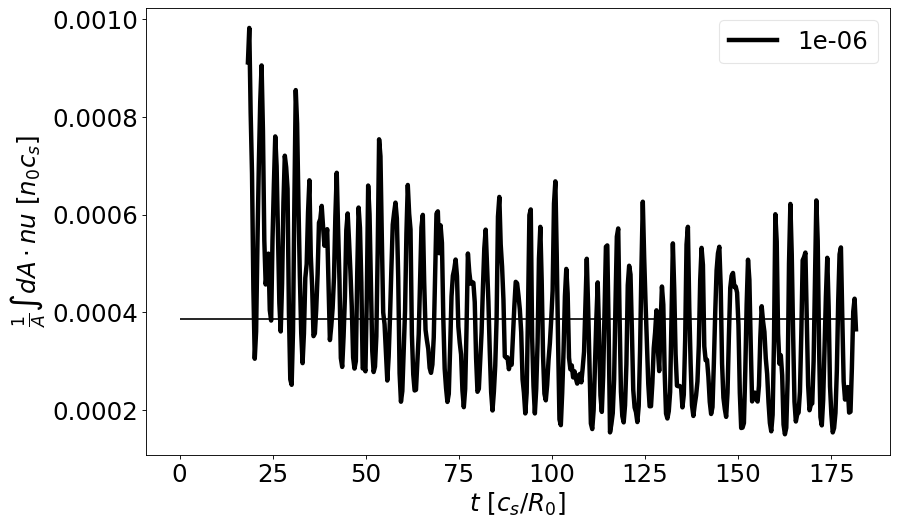

Invert for given numerical parameters
Average flux is 1.75e-03 pm 2.06e-04
Total average mass loss rate is 8589.0
Total mass gain by sources is 8387.4
particle confinement time = 4.86e+02


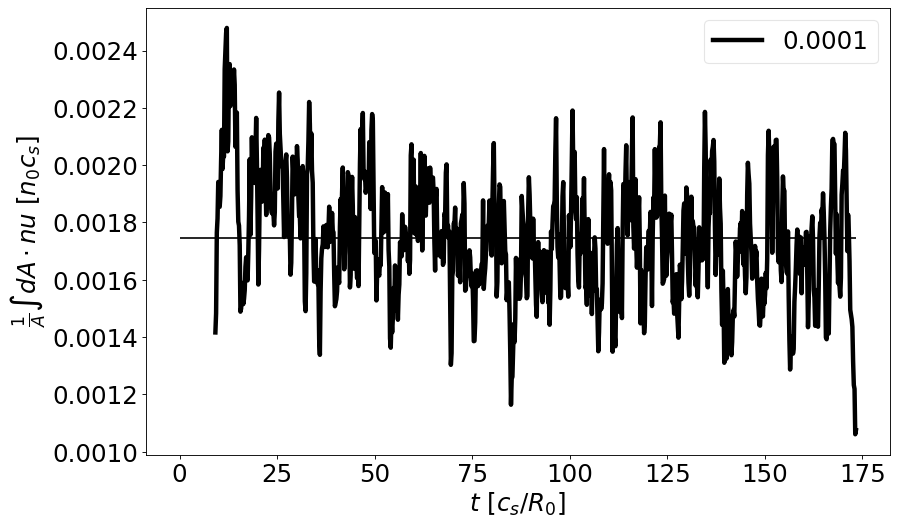

Invert for given numerical parameters
Average flux is 6.46e-04 pm 1.49e-04
Total average mass loss rate is 3175.5
Total mass gain by sources is 2935.6
particle confinement time = 1.30e+03


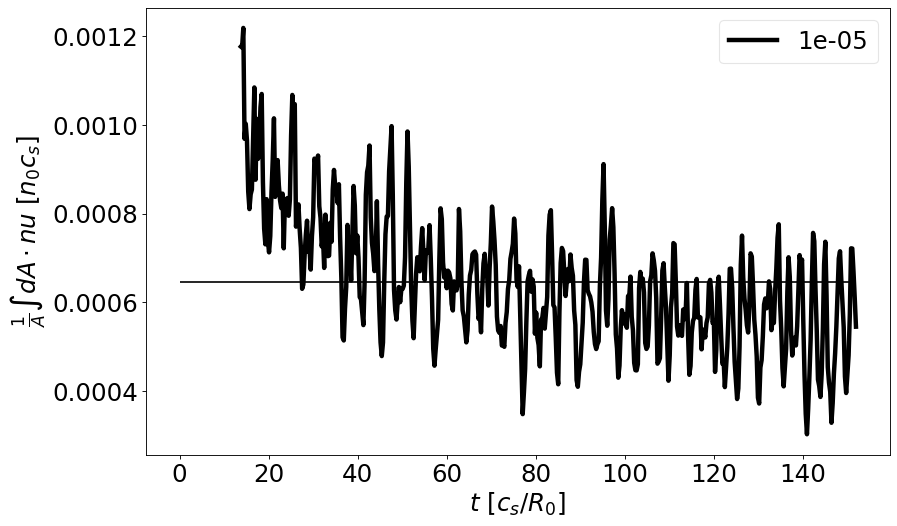

Invert for given numerical parameters
Average flux is 4.66e-04 pm 1.55e-04
Total average mass loss rate is 2290.4
Total mass gain by sources is 2516.2
particle confinement time = 1.82e+03


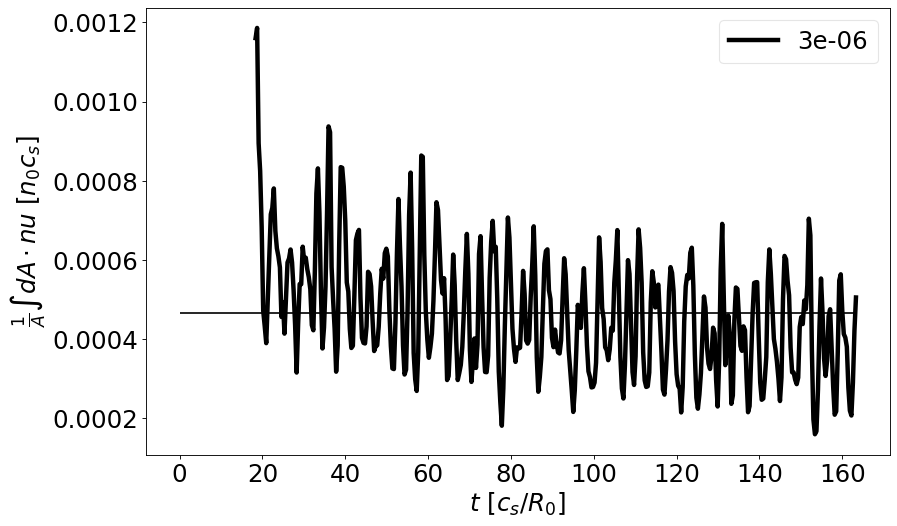

Invert for given numerical parameters
Average flux is 9.47e-04 pm 1.74e-04
Total average mass loss rate is 4657.7
Total mass gain by sources is 4193.7
particle confinement time = 8.84e+02


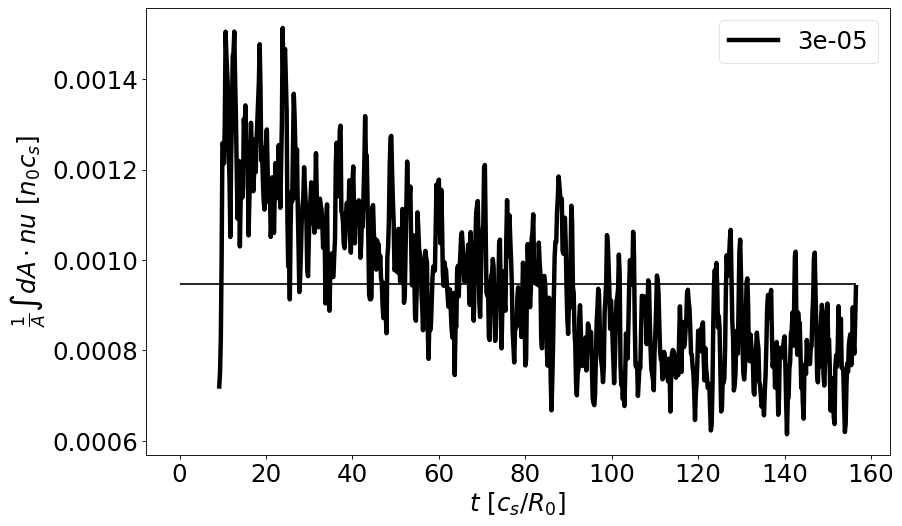

Invert for given numerical parameters
Average flux is 3.71e-03 pm 4.00e-04
Total average mass loss rate is 18270.2
Total mass gain by sources is 16774.8
particle confinement time = 2.27e+02


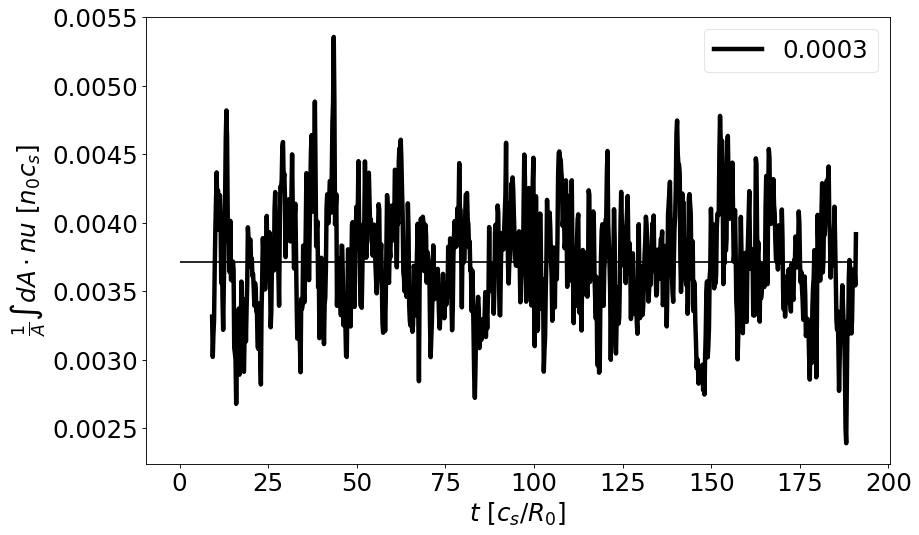

In [51]:
# Observations: 
# - jvne is larger than perpendicular diffusion
# - perpendicular diffusion is larger than parallel diffusion
resistivity = np.array([])
confinement_time = np.array([])
average_flux = np.array([])
total_flux = np.array([])
sigma_flux = np.array([])

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dd = Dataset( data.outfile(file), 'r')
    #da = Dataset( diag.outfile(file), "r")
    da = create_merged_dataset( diag, file)
    da0 = Dataset( diag.outfile( file, 0), 'r')
    #pl = nc.Dataset( plot.outfile(file), "r")
    
    #print( dset)
    pp = json.loads( da.inputfile )
    time = np.asarray(da['time'][:])
    #print( time)
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    rho = da0['rho'][:]
    rho_t = da0['rho_t'][:]
    rho_p = da0['rho_p'][:]
    lcfs = np.argmax( rho_t[np.where( rho_t < 1)])
    idx = lcfs
    area = da0['psi_area'][:]
    volume = da0['psi_vol'][:]
    
    num = {"R_0" : pp["magnetic_field"]['params']["R_0"], **pp["physical"]}
    fp.numerical2physical( num, pp['physical'])
#     print( pp["physical"])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0  
#     timescale = 1
    fluxscale = fp.c_s(**pp['physical'])*pp['physical']['n_0']
    
    mass =np.asarray(da['electrons_ifs_lcfs'][:])
    average_mass = np.mean(mass)
    masstt=np.append(np.zeros(1),mass, axis=0)
    deltamass = np.diff(masstt)/deltat

    # jvne= dset.variables['jvneE_tt_fsa'][:,:]
    jvne=np.asarray(da['jvneC_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(da['jvneE_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(da['jvneA_tt_ifs_lcfs'][:])/deltat
    divjvne = np.asarray(da["divjnepar_tt_ifs_lcfs"][:])/deltat
    average_jvne = np.mean(jvne[min_idx:]) # don't keep initial phase in statistics
    sigma_jvne = jvne[min_idx:].std()
    source = np.asarray(da["sne_tt_ifs_lcfs"][:])/deltat
    average_source = source[min_idx:].mean()
    resistivity = np.append( resistivity, pp["physical"]["resistivity"])
    print( f"Average flux is { average_jvne/area[idx]:1.2e} pm {sigma_jvne/area[idx]:1.2e}")
    print( f"Total average mass loss rate is {average_jvne:6.1f}")
    print( f"Total mass gain by sources is {average_source:6.1f}" )
    average_flux = np.append( average_flux, average_jvne/area[idx] )
    total_flux = np.append( total_flux, average_jvne)
    sigma_flux = np.append(sigma_flux, sigma_jvne/area[idx] )
    print( f"particle confinement time = {average_mass/average_jvne*timescale:1.2e}")
    confinement_time = np.append( confinement_time, average_mass/average_jvne*timescale )
    tau = mass/jvne

    plt.plot(time[min_idx:]*timescale,jvne[min_idx:]/area[idx], color='k', 
             marker='',ls='-', lw=4,markeredgecolor='k', markersize=8, 
             label=f'{pp["physical"]["resistivity"]}')
    plt.hlines(average_jvne/area[idx], time[0]*timescale, time[len(time)-1]*timescale, color='k')

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    da.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")
    plt.ylabel(r"$\frac{1}{A}\int dA \cdot nu\ [n_0c_s]$")

    plt.show(   )


Resistivity  [1.e-06 1.e-04 1.e-05 3.e-06 3.e-05 3.e-04]
Average flux  [0.00038573 0.00174632 0.00064564 0.00046569 0.00094701 0.0037147 ]
Total flux  [ 1897.15360255  8589.00605323  3175.4895771   2290.40954738
  4657.71716813 18270.19812517]
Sigma flux  [0.00015412 0.00020595 0.00014861 0.00015493 0.00017433 0.00039992]
Confinement time  [2189.01574097  486.04465829 1302.06522016 1816.68979874  884.35797433
  226.6617169 ]


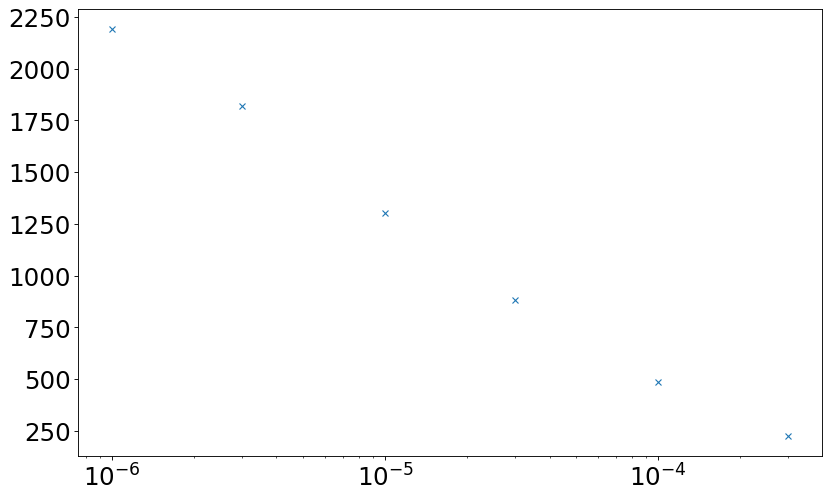

In [52]:
print( "Resistivity ", resistivity)
print( "Average flux ", average_flux)
print( "Total flux ", total_flux)
print( "Sigma flux ", sigma_flux)
print( "Confinement time ", confinement_time)

fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
plt.plot(resistivity, confinement_time, marker='x', ls='')
ax.set_xscale('log')
# ax.set_yscale('log')
plt.show()

### Volume Integrated Mass conservation

Invert for given numerical parameters
Resistivity = 1e-06
Average diff =  -62.96272919665515


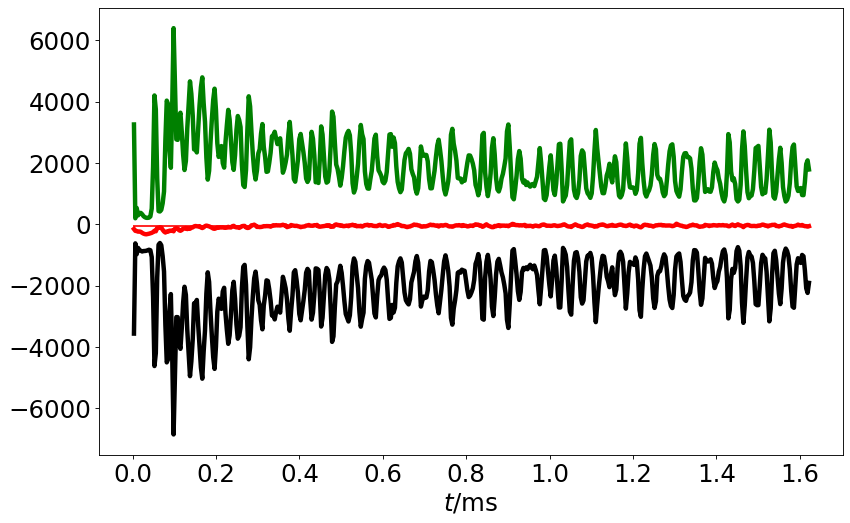

Invert for given numerical parameters
Resistivity = 0.0001
Average diff =  67.31205255341679


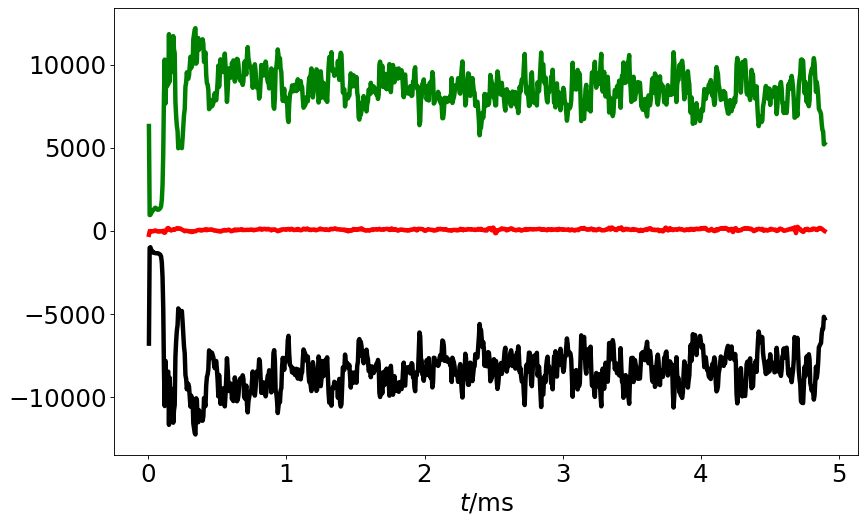

Invert for given numerical parameters
Resistivity = 1e-05
Average diff =  -36.882999540887994


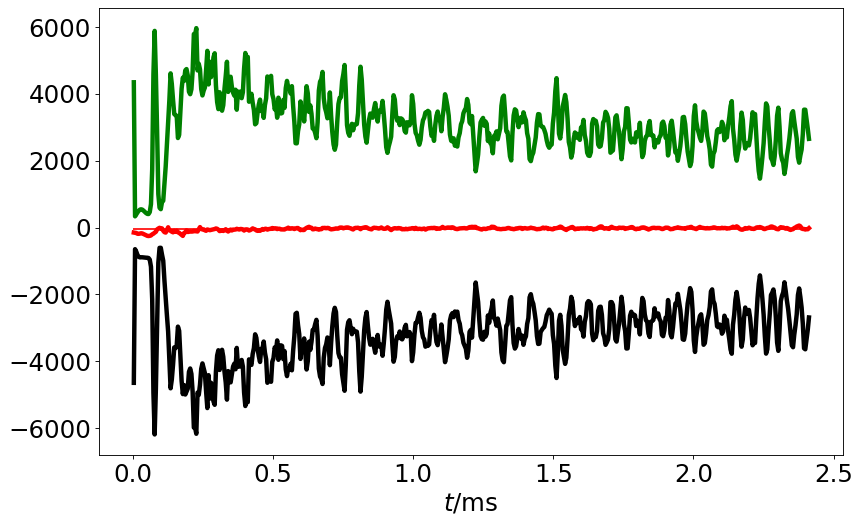

Invert for given numerical parameters
Resistivity = 3e-06
Average diff =  -56.94688330313292


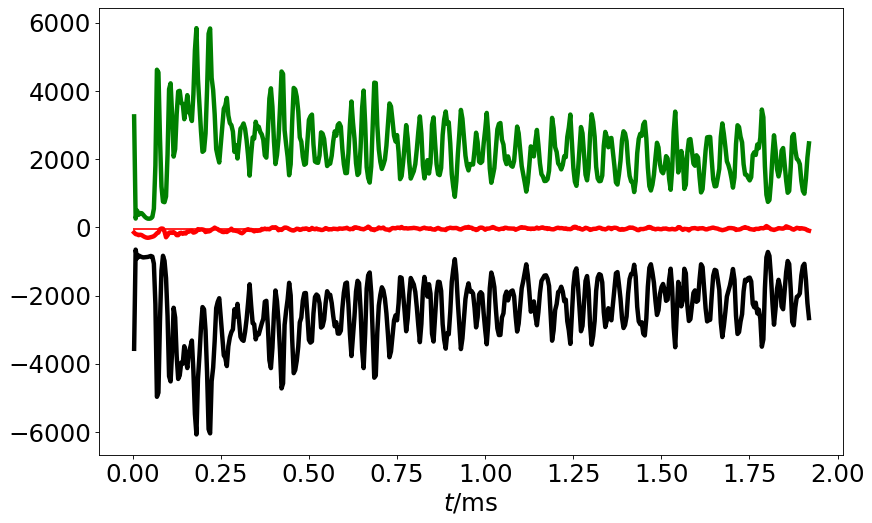

Invert for given numerical parameters
Resistivity = 3e-05
Average diff =  -1.0121436816506324


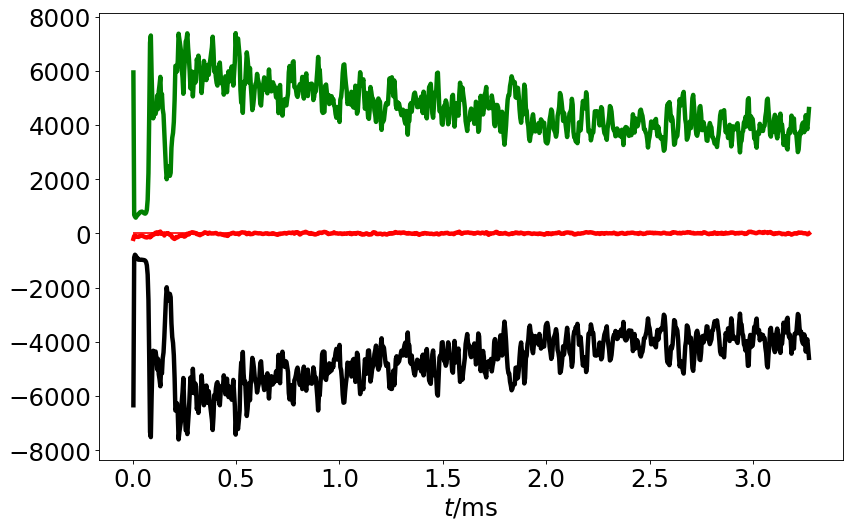

Invert for given numerical parameters
Resistivity = 0.0003
Average diff =  267.46444671954737


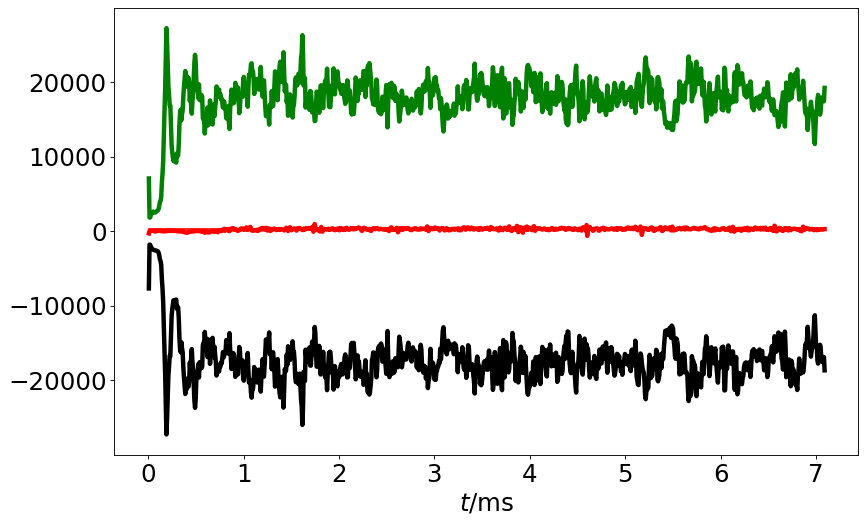

In [65]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dset = Dataset( diag.outfile(file), 'r')
    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )
    time = np.asarray(dset['time'][:])
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
    timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
#     timescale = 1/num['R_0']# in cs/R_0  
    mass = np.asarray(dset.variables['electrons_ifs_lcfs'][:])
    masstt=np.append(np.zeros(1),mass, axis=0)

    deltamass = np.diff(masstt,axis=0)/deltat
    source = np.asarray(dset.variables['sne_tt_ifs_lcfs'][:])/deltat
    deltamass-=source
    jvne= np.asarray(dset['jvneE_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvneC_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvneA_tt_ifs_lcfs'][:])/deltat
    divjvnepar=np.asarray(dset['divjnepar_tt_ifs_lcfs'][:])/deltat
    #jvne+=divjvnepar

    diff_perp = np.asarray(dset["lneperp_tt_ifs_lcfs"][:])/deltat
    diff_para = np.asarray(dset["lneparallel_tt_ifs_lcfs"][:])/deltat
    rhs = jvne-diff_perp-diff_para
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean(diff[1:])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff)
    plt.plot(time[1:]*timescale,deltamass[1:], color='k', marker='',
              ls='-', lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[1:]*timescale,rhs[1:], color='g', marker='',
              ls='-', lw=4,markeredgecolor='g', markersize=8, label="rhs")
    plt.plot(time[1:]*timescale,diff[1:], color='r', marker='',ls='-', 
              lw=4,markeredgecolor='r', markersize=8, label="(lhs+rhs)/2")
    plt.hlines(average_diff, time[0]*timescale, time[len(time)-1]*timescale, color='r')
#     plt.plot(time[min_idx:]*timescale,divjvnepar[min_idx:], color='g', marker='',
#              ls='--', lw = 4, label="parallel")

    dset.close()
    
    plt.xlabel(r"$t/$ms")

    plt.show(   )

## Energy conservation

Invert for given numerical parameters
Average flux is 3.51e-04 pm 2.04e-04
Total average mass loss rate is 1724.6
Total mass gain by sources is 13282.3
particle confinement time = 3.05e+02


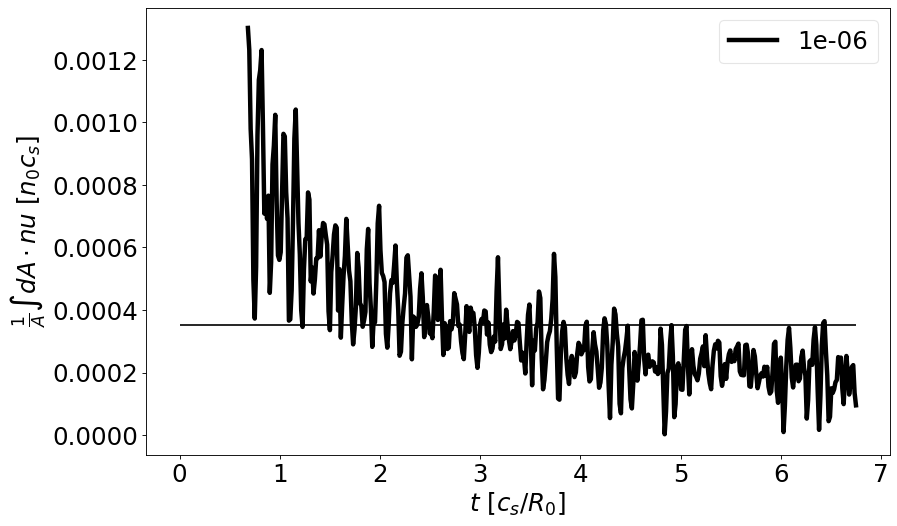

Invert for given numerical parameters
Average flux is 3.39e-03 pm 4.61e-04
Total average mass loss rate is 16669.3
Total mass gain by sources is 53373.0
particle confinement time = 3.16e+01


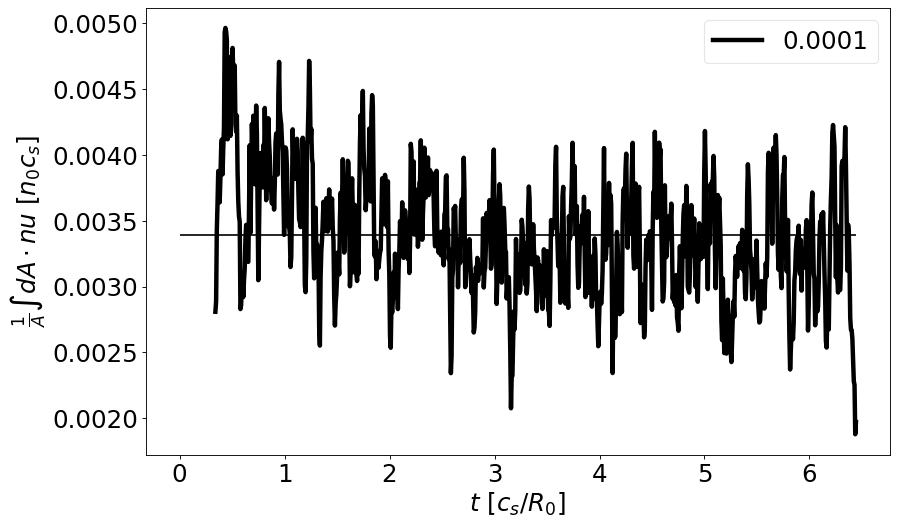

Invert for given numerical parameters
Average flux is 8.39e-04 pm 2.85e-04
Total average mass loss rate is 4127.3
Total mass gain by sources is 18637.3
particle confinement time = 1.26e+02


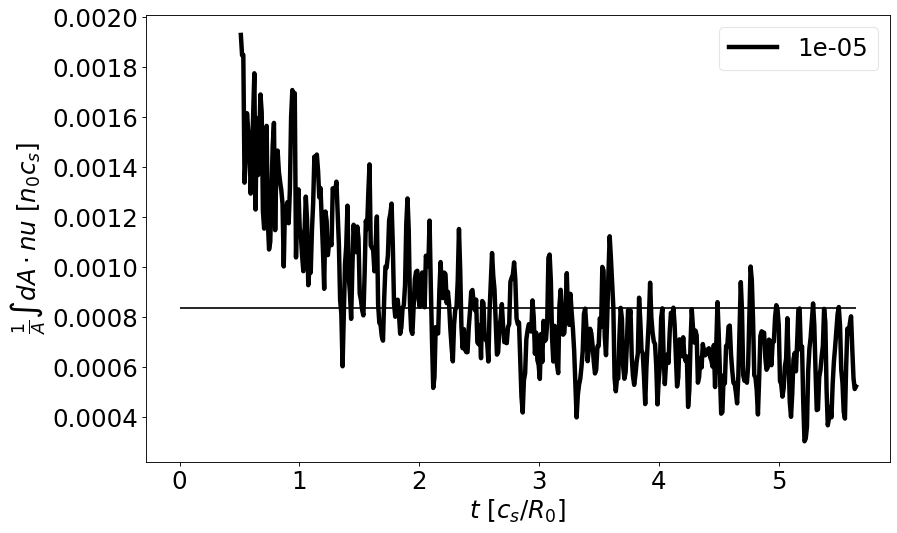

Invert for given numerical parameters
Average flux is 4.87e-04 pm 2.13e-04
Total average mass loss rate is 2397.3
Total mass gain by sources is 15986.5
particle confinement time = 2.20e+02


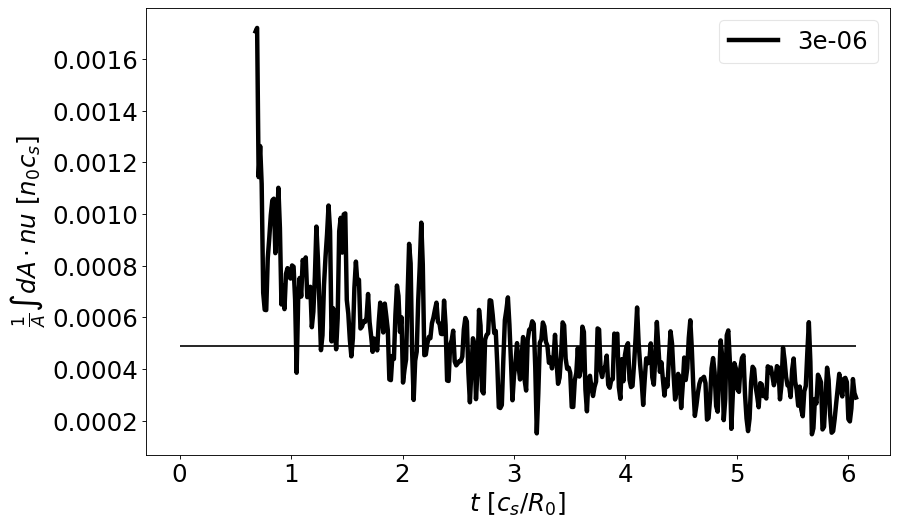

Invert for given numerical parameters
Average flux is 1.40e-03 pm 4.11e-04
Total average mass loss rate is 6874.2
Total mass gain by sources is 26741.0
particle confinement time = 7.56e+01


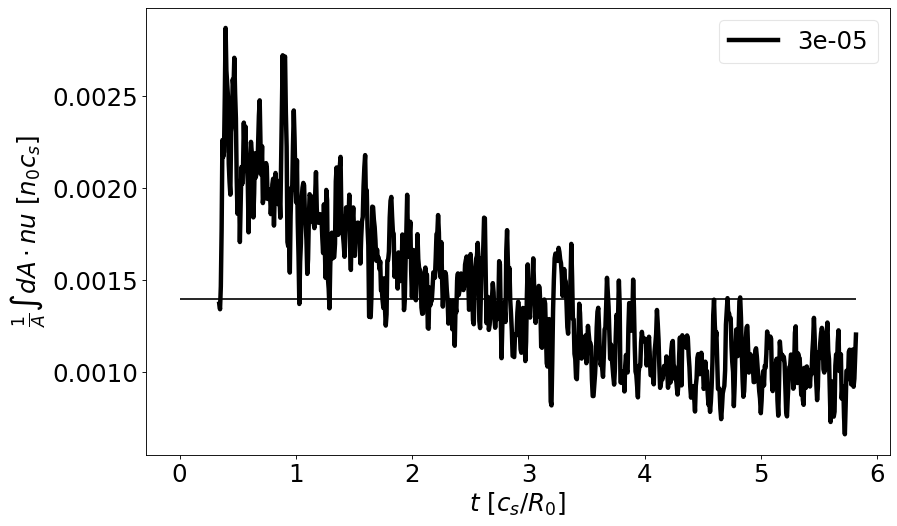

Invert for given numerical parameters
Average flux is 9.94e-03 pm 1.20e-03
Total average mass loss rate is 48900.0
Total mass gain by sources is 103967.8
particle confinement time = 1.04e+01


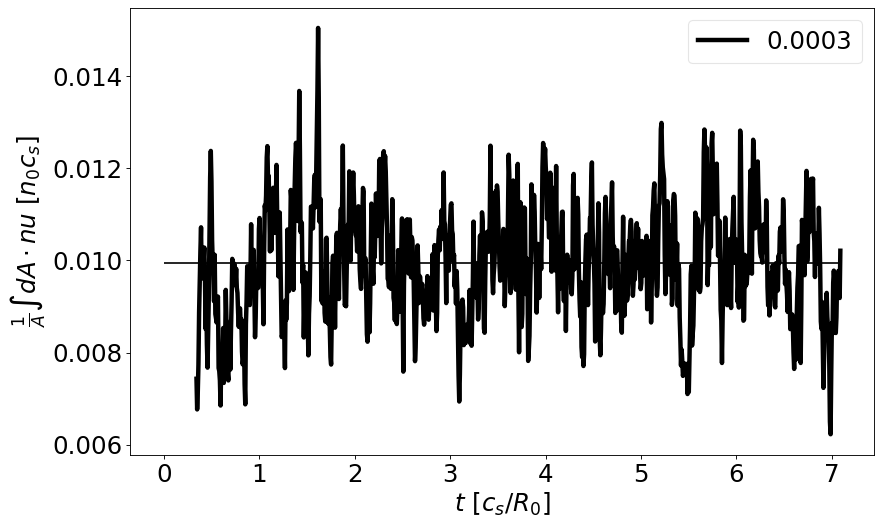

In [54]:
# Observations: 
# - jvne is larger than perpendicular diffusion
# - perpendicular diffusion is larger than parallel diffusion
resistivity = np.array([])
confinement_time = np.array([])
average_flux = np.array([])
total_flux = np.array([])
sigma_flux = np.array([])

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')

    da = create_merged_dataset( diag, file)
    da0 = Dataset( diag.outfile( file, 0), 'r')
 
    pp = json.loads( da.inputfile )
    time = np.asarray(da['time'][:])
    #print( time)
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    rho = da0['rho'][:]
    rho_t = da0['rho_t'][:]
    rho_p = da0['rho_p'][:]
    lcfs = np.argmax( rho_t[np.where( rho_t < 1)])
    idx = lcfs
    area = da0['psi_area'][:]
    volume = da0['psi_vol'][:]
    
    num = {"R_0" : pp["magnetic_field"]['params']["R_0"], **pp["physical"]}
    fp.numerical2physical( num, pp['physical'])
#     print( pp["physical"])
    timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
#     timescale = 1/num['R_0']# in cs/R_0  
#     timescale = 1
    fluxscale = fp.c_s(**pp['physical'])*pp['physical']['n_0']
    
    mass =np.asarray(da['ue2_ifs_lcfs'][:])
    mass+=np.asarray(da['nelnne_ifs_lcfs'][:])
    mass+=np.asarray(da['nilnni_ifs_lcfs'][:])
    mass+=np.asarray(da['neue2_ifs_lcfs'][:])
    mass+=np.asarray(da['niui2_ifs_lcfs'][:])
    mass+=np.asarray(da['aperp2_ifs_lcfs'][:])
    average_mass = np.mean(mass)
    masstt=np.append(np.zeros(1),mass, axis=0)
    deltamass = np.diff(masstt)/deltat

    jvne = da.variables['jvee_tt_ifs_lcfs'][:]/deltat
    jvne+= da.variables['jvei_tt_ifs_lcfs'][:]/deltat
    jvne+= da.variables['jveea_tt_ifs_lcfs'][:]/deltat
    jvne+= da.variables['jveia_tt_ifs_lcfs'][:]/deltat
    average_jvne = np.mean(jvne[min_idx:]) # don't keep initial phase in statistics
    sigma_jvne = jvne[min_idx:].std()
    source =da.variables['see_tt_ifs_lcfs'][:]/deltat
    source+=da.variables['sei_tt_ifs_lcfs'][:]/deltat
    average_source = source[min_idx:].mean()
    resistivity = np.append( resistivity, pp["physical"]["resistivity"])
    print( f"Average flux is { average_jvne/area[idx]:1.2e} pm {sigma_jvne/area[idx]:1.2e}")
    print( f"Total average mass loss rate is {average_jvne:6.1f}")
    print( f"Total mass gain by sources is {average_source:6.1f}" )
    average_flux = np.append( average_flux, average_jvne/area[idx] )
    total_flux = np.append( total_flux, average_jvne)
    sigma_flux = np.append(sigma_flux, sigma_jvne/area[idx] )
    print( f"particle confinement time = {average_mass/average_jvne*timescale:1.2e}")
    confinement_time = np.append( confinement_time, average_mass/average_jvne*timescale )
    tau = mass/jvne

    plt.plot(time[min_idx:]*timescale,jvne[min_idx:]/area[idx], color='k', 
             marker='',ls='-', lw=4,markeredgecolor='k', markersize=8, 
             label=f'{pp["physical"]["resistivity"]}')
    plt.hlines(average_jvne/area[idx], time[0]*timescale, time[len(time)-1]*timescale, color='k')

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    da.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")
    plt.ylabel(r"$\frac{1}{A}\int dA \cdot nu\ [n_0c_s]$")

    plt.show(   )


Resistivity  [1.e-06 1.e-04 1.e-05 3.e-06 3.e-05 3.e-04]
Average flux  [0.00035064 0.00338921 0.00083917 0.00048742 0.00139766 0.00994235]
Total flux  [ 1724.57000758 16669.32545043  4127.32434447  2397.31838908
  6874.18105194 48899.98798201]
Sigma flux  [0.00020407 0.00046123 0.00028505 0.00021267 0.00041063 0.00119869]
Confinement time  [304.95345654  31.5645095  126.17584611 219.66912389  75.63025622
  10.3950755 ]


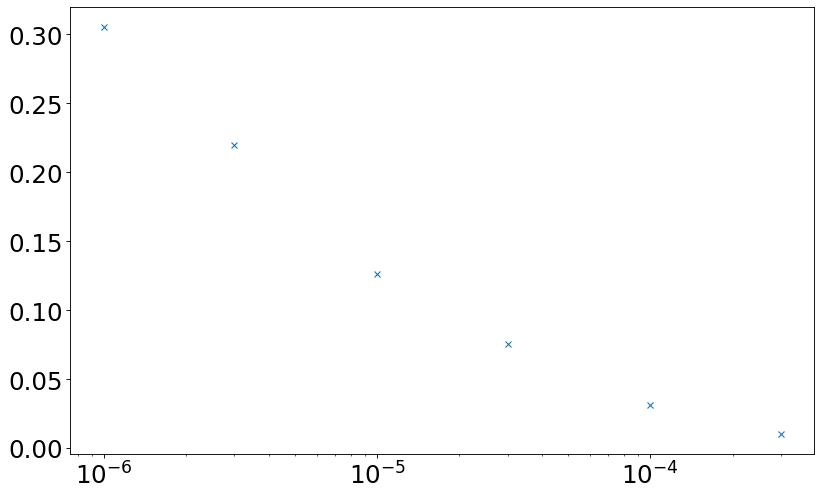

In [55]:
print( "Resistivity ", resistivity)
print( "Average flux ", average_flux)
print( "Total flux ", total_flux)
print( "Sigma flux ", sigma_flux)
print( "Confinement time ", confinement_time)

fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
plt.plot(resistivity, confinement_time*1e-3, marker='x', ls='')
# Plot error bar 
# label axes
# plt.errorbar( resistivty)
ax.set_xscale('log')
# ax.set_yscale('log')
plt.show()

Invert for given numerical parameters
Resistivity = 1e-06
Average diff =  -28.88828428590139


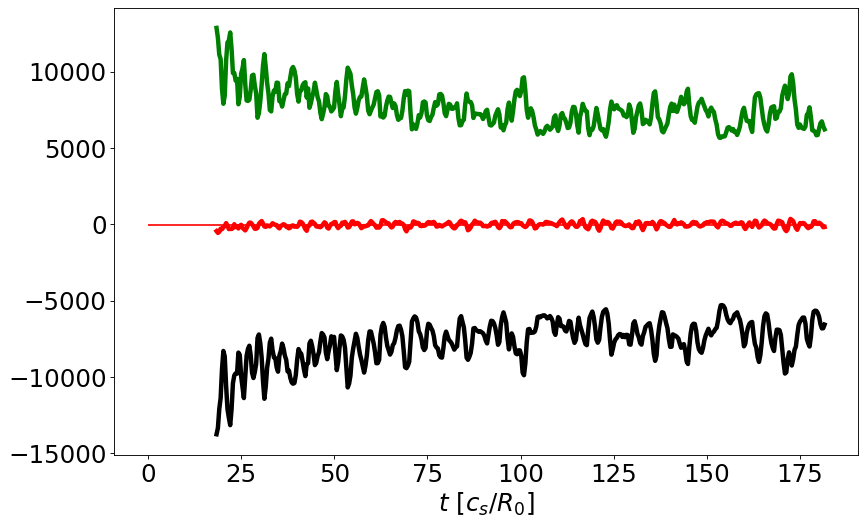

Invert for given numerical parameters
Resistivity = 0.0001
Average diff =  -711.6256642574389


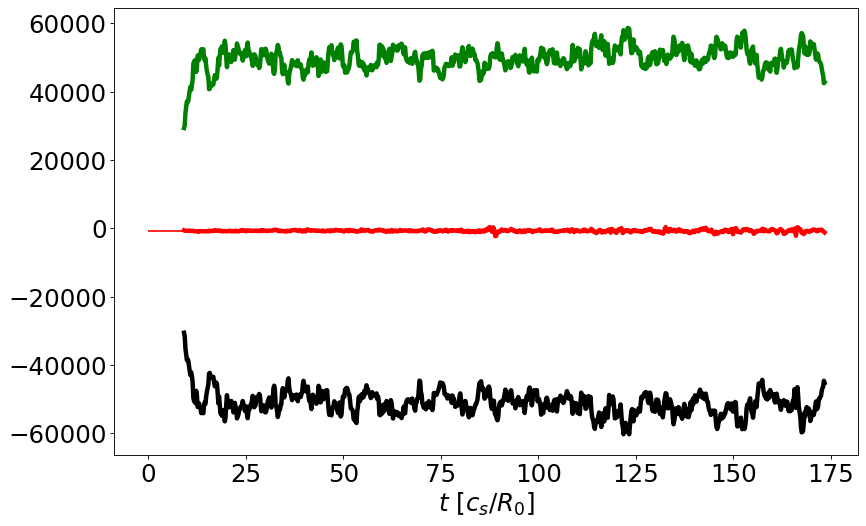

Invert for given numerical parameters
Resistivity = 1e-05
Average diff =  -127.37678197714995


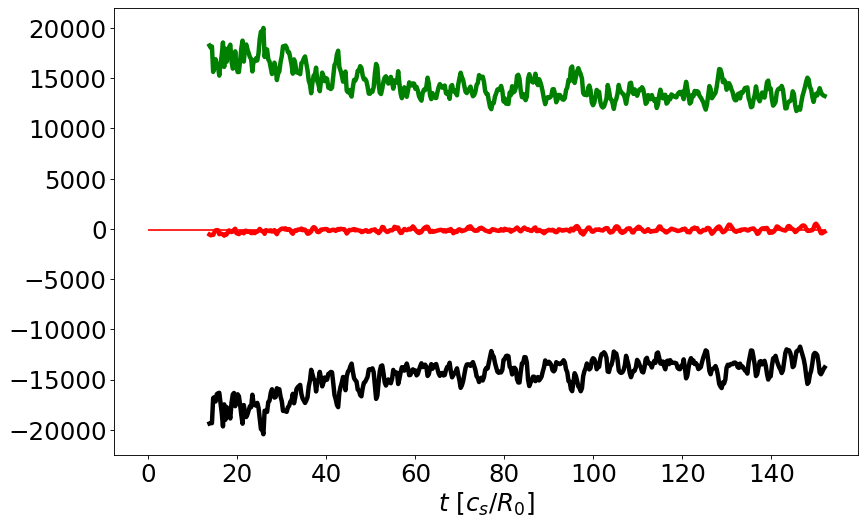

Invert for given numerical parameters
Resistivity = 3e-06
Average diff =  -49.94982731835218


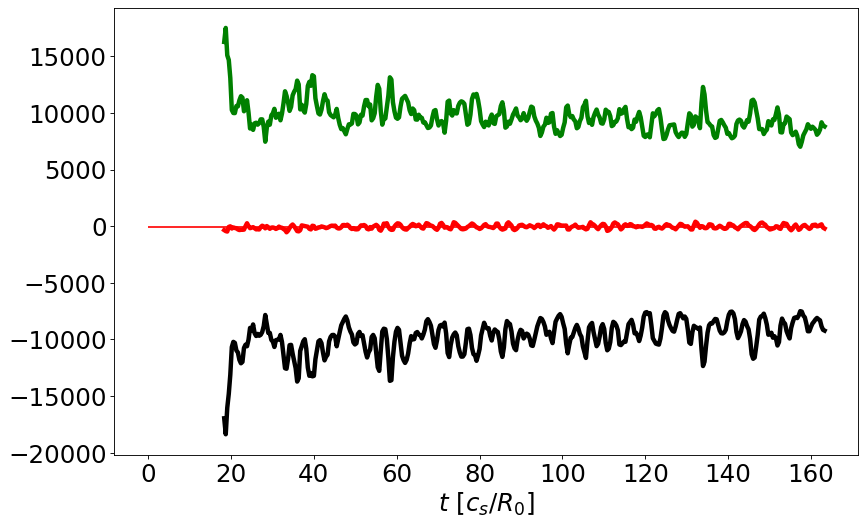

Invert for given numerical parameters
Resistivity = 3e-05
Average diff =  -208.2130999549727


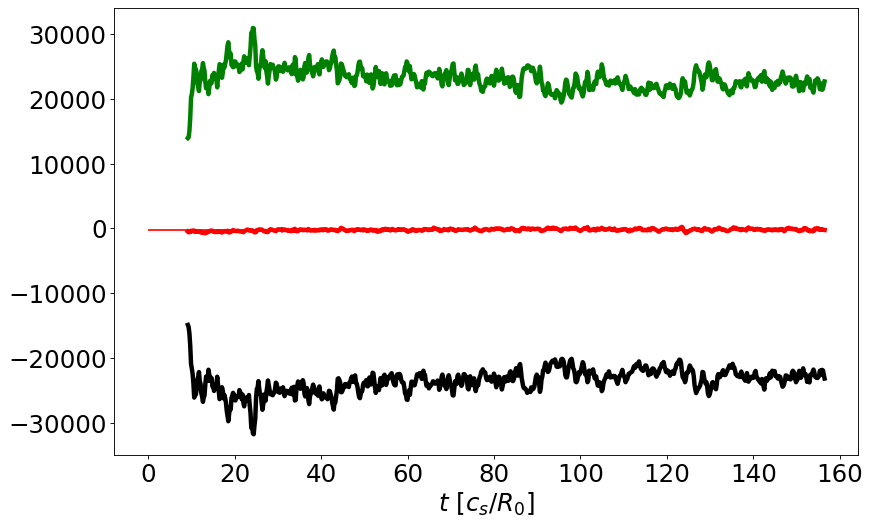

Invert for given numerical parameters
Resistivity = 0.0003
Average diff =  -1304.0174631972673


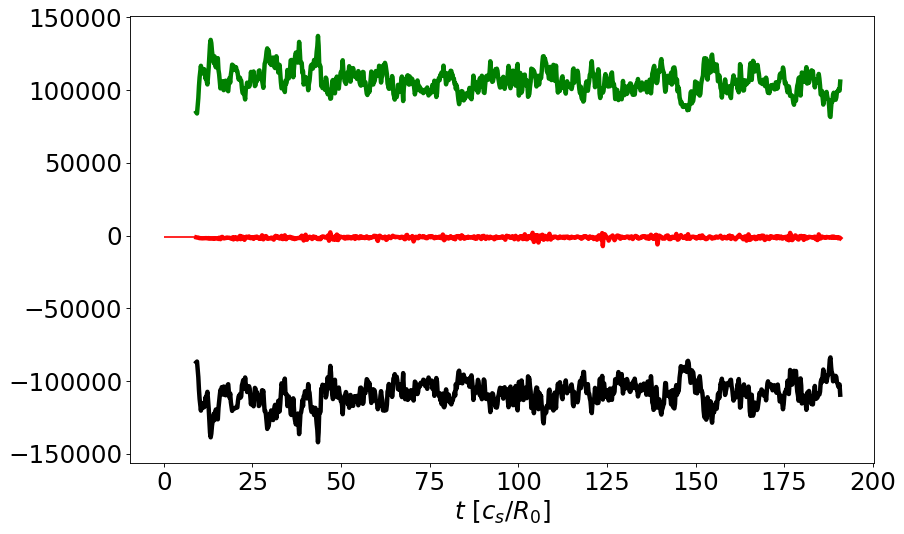

In [56]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dset = Dataset( diag.outfile(file), 'r')
    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )
    time = np.asarray(dset['time'][:])
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0  
    mass =np.asarray(dset['ue2_ifs_lcfs'][:])
    mass+=np.asarray(dset['nelnne_ifs_lcfs'][:])
    mass+=np.asarray(dset['nilnni_ifs_lcfs'][:])
    mass+=np.asarray(dset['neue2_ifs_lcfs'][:])
    mass+=np.asarray(dset['niui2_ifs_lcfs'][:])
    mass+=np.asarray(dset['aperp2_ifs_lcfs'][:])
    masstt=np.append(np.zeros(1),mass, axis=0)

    deltamass = np.diff(masstt,axis=0)/deltat
    source =np.asarray(dset.variables['see_tt_ifs_lcfs'][:])/deltat
    source+=np.asarray(dset.variables['sei_tt_ifs_lcfs'][:])/deltat
    deltamass-=source
    jvne = np.asarray(dset.variables['jvee_tt_ifs_lcfs'][:])/deltat
    jvne+= np.asarray(dset.variables['jvei_tt_ifs_lcfs'][:])/deltat
    jvne+= np.asarray(dset.variables['jveea_tt_ifs_lcfs'][:])/deltat
    jvne+= np.asarray(dset.variables['jveia_tt_ifs_lcfs'][:])/deltat

    diff_perp = np.asarray(dset.variables["leeperp_tt_ifs_lcfs"][:])/deltat
    diff_para = np.asarray(dset.variables["leeparallel_tt_ifs_lcfs"][:])/deltat
    diff_perp+= np.asarray(dset.variables["leiperp_tt_ifs_lcfs"][:])/deltat
    diff_para+= np.asarray(dset.variables["leiparallel_tt_ifs_lcfs"][:])/deltat
    resistive = np.asarray(dset.variables['resistivity_tt_ifs_lcfs'][:])/deltat
    rhs = jvne-diff_perp-diff_para-resistive
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean(diff[min_idx:])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff)
    plt.plot(time[min_idx:]*timescale,deltamass[min_idx:], color='k', marker='',
              ls='-', lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[min_idx:]*timescale,rhs[min_idx:], color='g', marker='',
              ls='-', lw=4,markeredgecolor='g', markersize=8, label="rhs")
    plt.plot(time[min_idx:]*timescale,diff[min_idx:], color='r', marker='',ls='-', 
              lw=4,markeredgecolor='r', markersize=8, label="(lhs+rhs)/2")
    plt.hlines(average_diff, time[0]*timescale, time[len(time)-1]*timescale, color='r')
#     plt.plot(time[min_idx:]*timescale,divjvnepar[min_idx:], color='g', marker='',
#              ls='--', lw = 4, label="parallel")

    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")

    plt.show(   )

### Average FSA Mass conservation 

Resistivity = 1e-06
Average diff =  1.6784707784201664e-06
Average std  =  3.4215061315512097e-06
Resistivity = 0.0001
Average diff =  1.5960165439281927e-06
Average std  =  2.712842359545761e-06
Resistivity = 1e-05
Average diff =  1.526464593000089e-06
Average std  =  3.1123289937390696e-06
Resistivity = 3e-06
Average diff =  1.8860468929011047e-06
Average std  =  3.2320810193912697e-06
Resistivity = 3e-05
Average diff =  1.5660955722440331e-06
Average std  =  3.331690351761374e-06
Resistivity = 0.0003
Average diff =  1.4078967928818472e-06
Average std  =  2.3160190764880804e-06


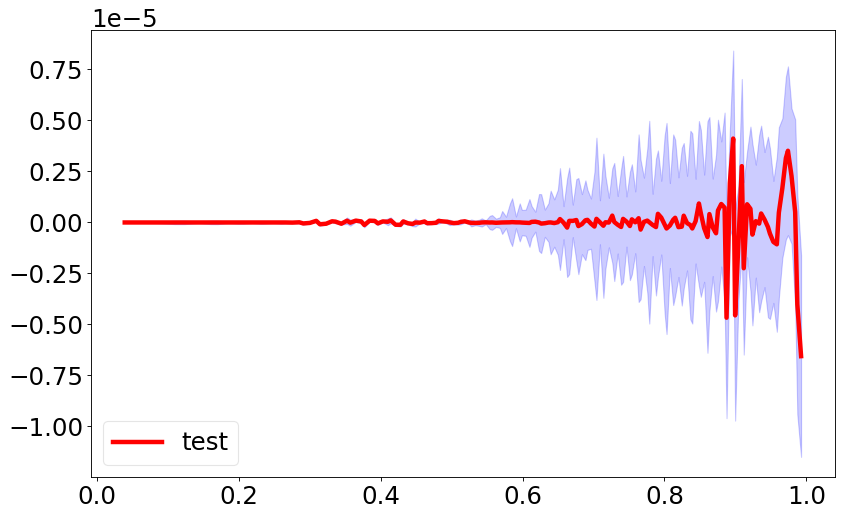

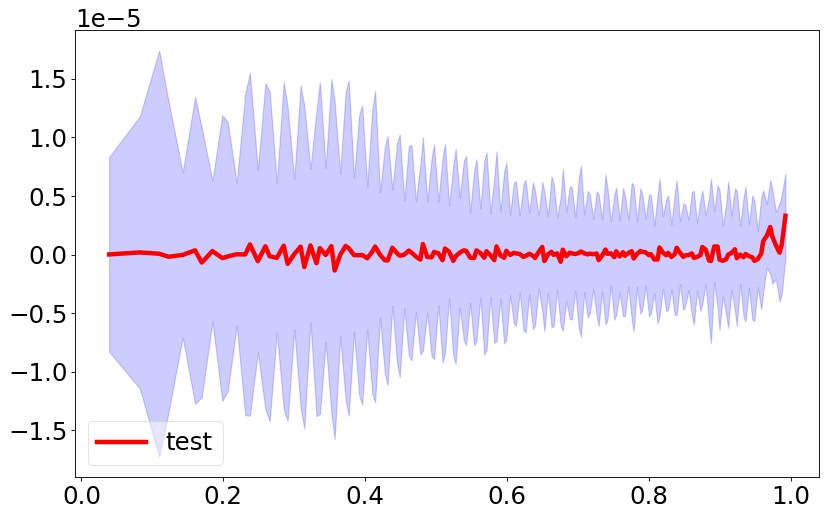

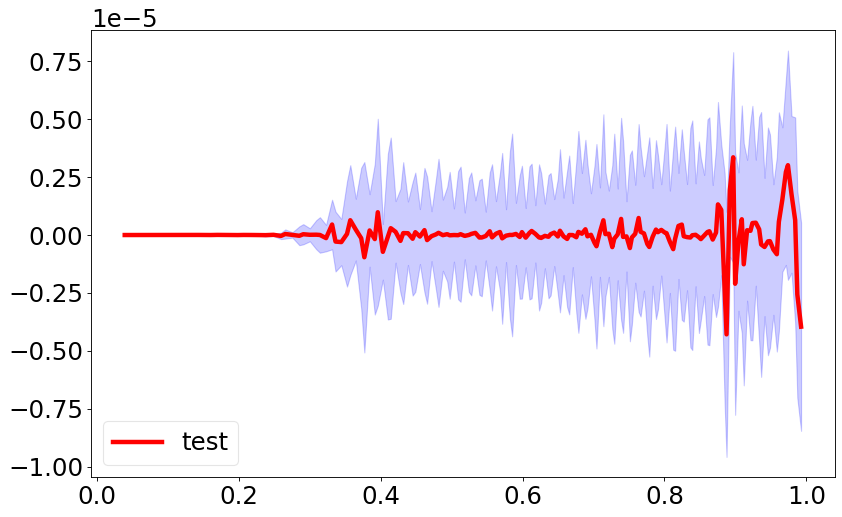

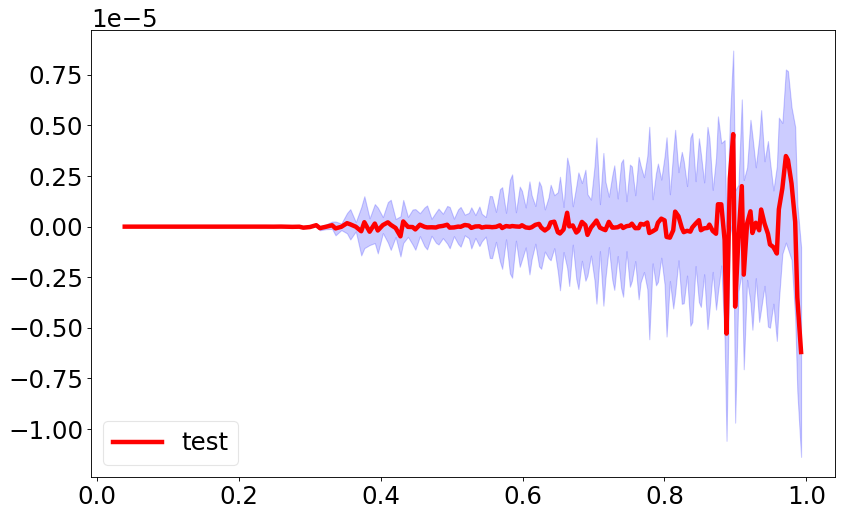

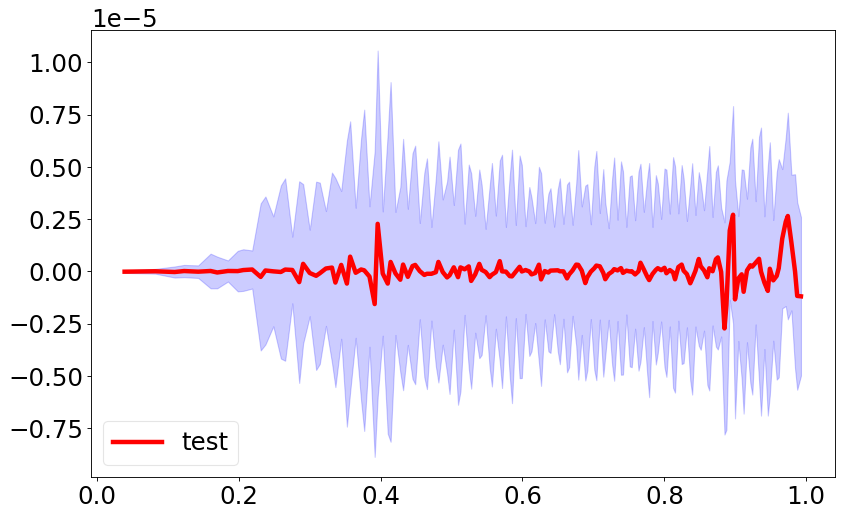

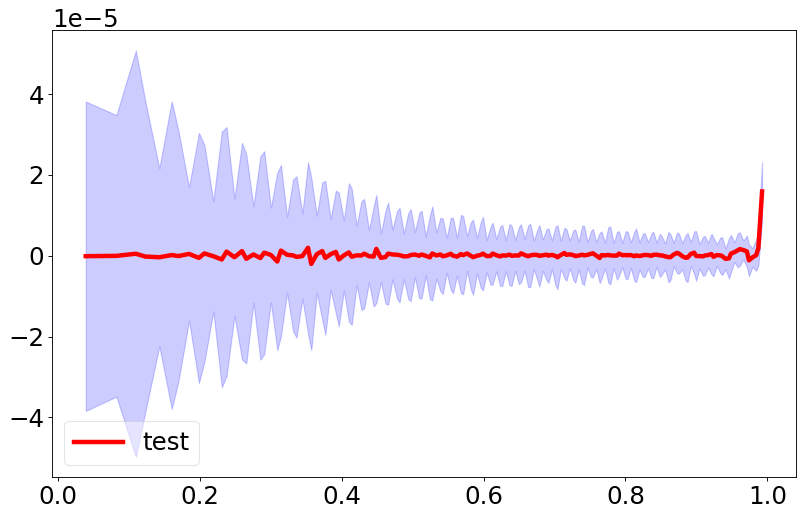

In [57]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dset = Dataset( diag.outfile(file), 'r')
    
    dset = create_merged_dataset( diag, file)
    params = json.loads(dset.inputfile)
    mass =np.asarray(dset.variables['electrons_fsa'][:,:])
    time = np.asarray(dset.variables['time'][:])
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    masstt=np.append(np.zeros((1,len(rho))),mass, axis=0)
    deltamass = np.diff(masstt,axis=0)/deltat[:,None]
    source = np.asarray(dset.variables['sne_tt_fsa'][:,:])/deltat[:,None]
    deltamass-=source

    jvneC=np.asarray(dset.variables['jvneC_tt_ifs'][:,:])/deltat[:,None]
    jvneE=np.asarray(dset.variables['jvneE_tt_ifs'][:,:])/deltat[:,None]
    jvneA=np.asarray(dset.variables['jvneA_tt_ifs'][:,:])/deltat[:,None]
    jvne = jvneC+jvneE+jvneA
    
    diff_perp = np.asarray(dset.variables["lneperp_tt_fsa"][:,:])/deltat[:,None]
    diff_parallel = np.asarray(dset.variables["lneparallel_tt_fsa"][:,:])/deltat[:,None]
    rhs = jvne-diff_perp-diff_parallel
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean( diff[1:], axis=0)
    average_std =  np.std( diff[1:], axis=0)
    idx=160
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff[idx])
    print( "Average std  = ", average_std[idx])

    plt.plot( rho_t[0:167], average_diff[0:167], ls = '-', color='r', lw = 4, label = 'test')
    plt.fill_between( rho_t[0:167], average_diff[0:167]-average_std[0:167], 
                      average_diff[0:167]+average_std[0:167], color='b', alpha=0.2)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='lower left',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()

### Local Mass conservation on LCFS

Invert for given numerical parameters
Resistivity = 1e-06
Average diff =  0.0009147665742389905
Average std  =  0.0018647208416954092
Invert for given numerical parameters
Resistivity = 0.0001
Average diff =  0.0008698290164408665
Average std  =  0.0014784990859524386
Invert for given numerical parameters
Resistivity = 1e-05
Average diff =  0.0008319232031850471
Average std  =  0.0016962193015877924
Invert for given numerical parameters
Resistivity = 3e-06
Average diff =  0.0010278955566311006
Average std  =  0.001761484155568243
Invert for given numerical parameters
Resistivity = 3e-05
Average diff =  0.0008535220868729959
Average std  =  0.0018157712417099469
Invert for given numerical parameters
Resistivity = 0.0003
Average diff =  0.0007673037521206056
Average std  =  0.0012622303966860022


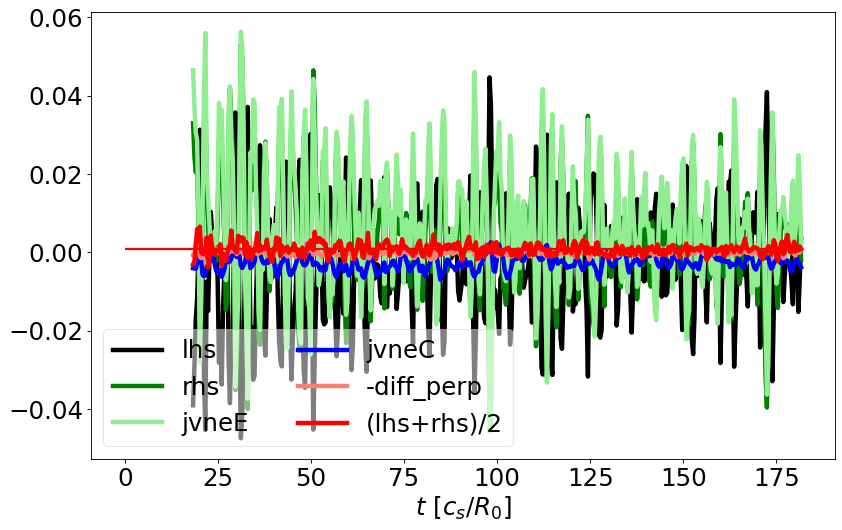

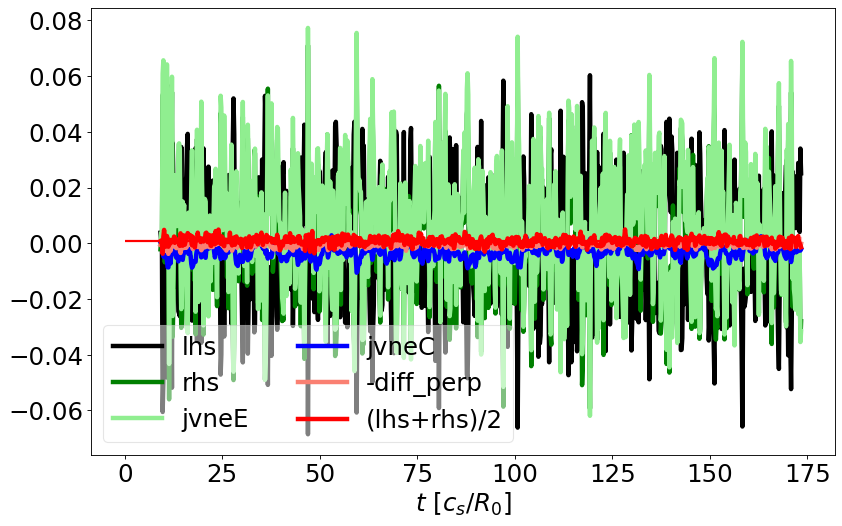

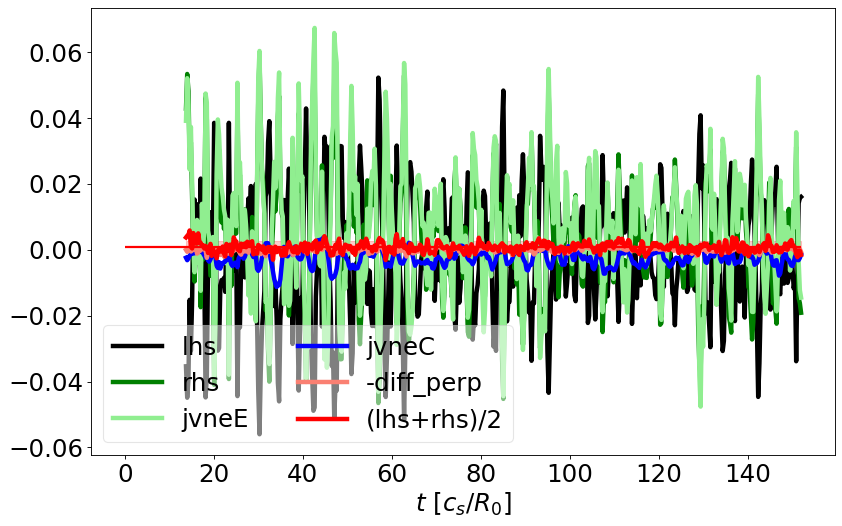

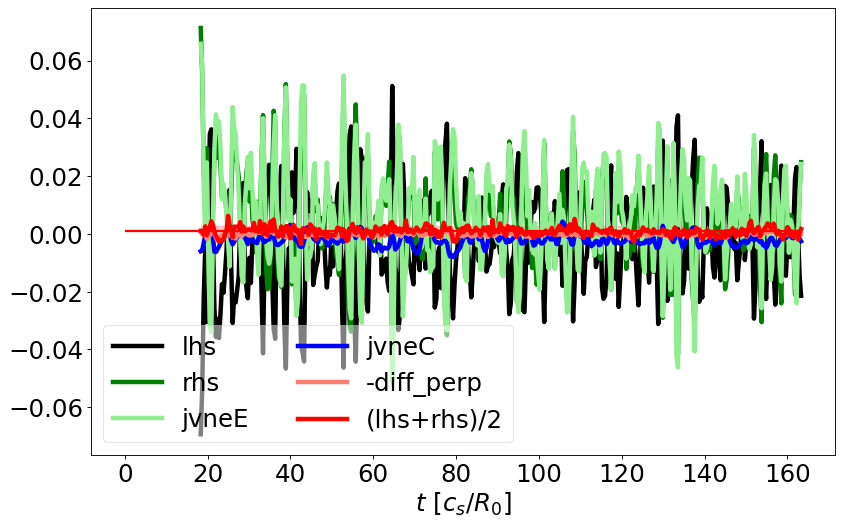

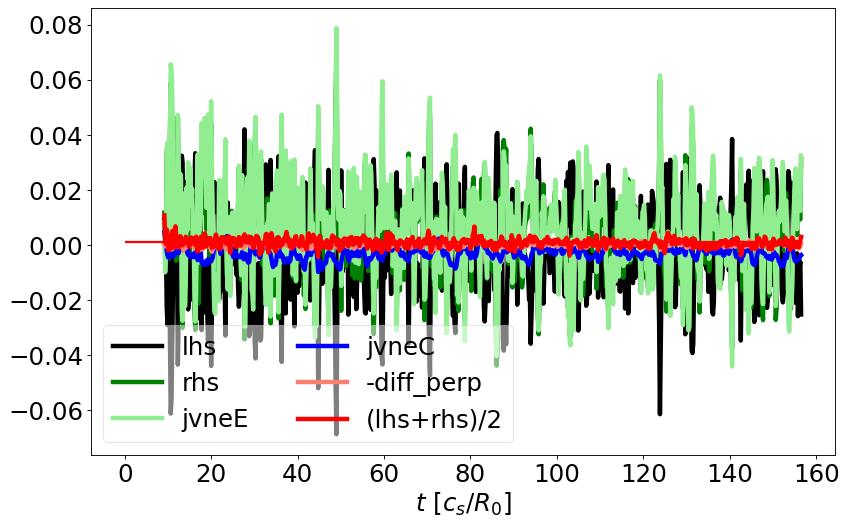

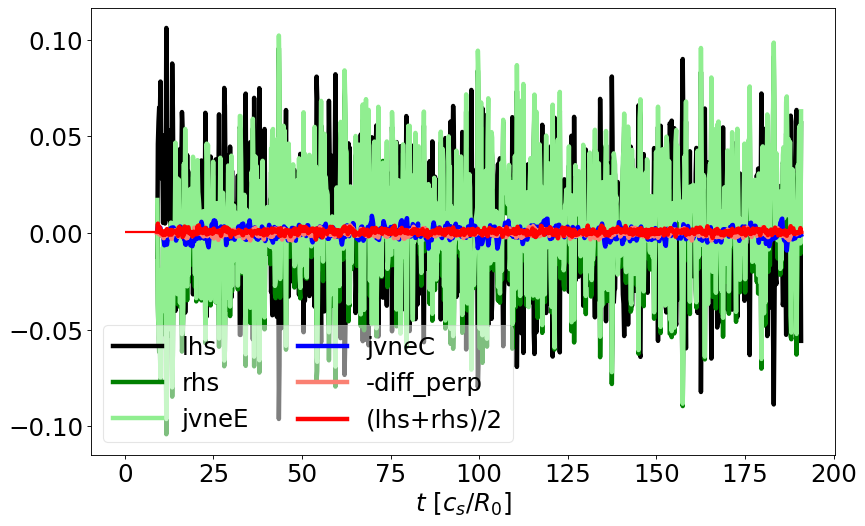

In [58]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    params= json.loads(dset.inputfile)
    mass =np.asarray(dset.variables['electrons_fsa'][:,:])
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0  
    time = np.asarray(dset.variables['time'][:])*timescale
    timett = np.append(2*time[len(time)-1] -time[len(time)-2], time ) # extrapolate
    deltat = np.diff(timett)
    masstt=np.append(np.zeros((1,len(rho))),mass, axis=0)
    deltamass = np.diff(masstt,axis=0)/deltat[:,None]
    source = np.asarray(dset.variables['sne_tt_fsa'][:,:])/deltat[:,None]
    deltamass-=source

    jvneC=np.asarray(dset.variables['jvneC_tt_ifs'][:,:])/deltat[:,None]
    jvneE=np.asarray(dset.variables['jvneE_tt_ifs'][:,:])/deltat[:,None]
    jvneA=np.asarray(dset.variables['jvneA_tt_ifs'][:,:])/deltat[:,None]
    jvne = jvneC+jvneE+jvneA
    
    diff_perp = np.asarray(dset.variables["lneperp_tt_fsa"][:,:])/deltat[:,None]
    diff_parallel = np.asarray(dset.variables["lneparallel_tt_fsa"][:,:])/deltat[:,None]
    rhs = jvne-diff_perp-diff_parallel
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean( diff[1:], axis=0)
    average_std =  np.std( diff[1:], axis=0)
    idx=160
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff[idx])
    print( "Average std  = ", average_std[idx])
    plt.plot(time[min_idx:],deltamass[min_idx:,idx], color='k', marker='',
              ls='-',lw=4, label="lhs")
    plt.plot(time[min_idx:],rhs[min_idx:,idx], color='g',
              ls='-', lw = 4,  label="rhs")
    plt.plot(time[min_idx:],jvneE[min_idx:,idx], color='lightgreen',
              ls='-', lw = 4, label="jvneE")
    plt.plot(time[min_idx:],jvneC[min_idx:,idx], color='blue',
              ls='-', lw = 4, label="jvneC")
    plt.plot(time[min_idx:],-diff_perp[min_idx:,idx], color='salmon',
              ls='-', lw = 4,  label="-diff_perp")
    plt.plot(time[min_idx:],diff[min_idx:,idx], color='r',
              ls='-', lw = 4,  label="(lhs+rhs)/2")
    plt.hlines(average_diff[idx], time[0], time[len(time)-1], color='r', lw=2 )
    plt.fill_between( time[min_idx:], average_diff[idx]-average_std[idx], 
                      average_diff[idx]+average_std[idx], color='red', alpha=0.2)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='lower left',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    plt.xlabel(r"$t\ [c_s/R_0]$")

### Density profile

Invert for given numerical parameters
Resistivity = 1e-06
Dataset length  496
Average region  18.34862385321101 181.651376146789
Invert for given numerical parameters
Resistivity = 0.0001
Dataset length  946
Average region  9.174311926605505 173.39449541284404
Invert for given numerical parameters
Resistivity = 1e-05
Dataset length  553
Average region  13.761467889908257 151.92660550458717
Invert for given numerical parameters
Resistivity = 3e-06
Dataset length  446
Average region  18.34862385321101 163.30275229357798
Invert for given numerical parameters
Resistivity = 3e-05
Dataset length  854
Average region  9.174311926605505 156.5137614678899
Invert for given numerical parameters
Resistivity = 0.0003
Dataset length  1041
Average region  9.174311926605505 190.8256880733945


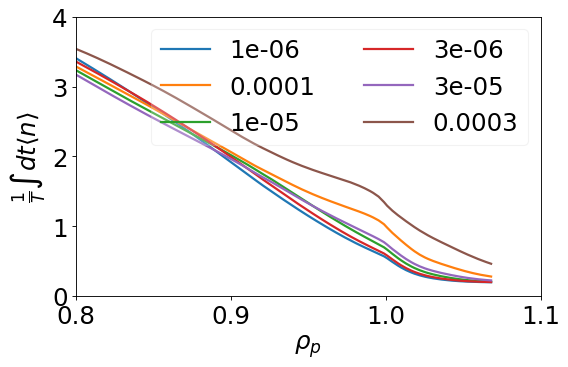

In [59]:

fig,ax=plt.subplots(1,1,figsize=(1.25*6,1.25*3.7),dpi= 80, facecolor='w', edgecolor='k')
for file in content :


    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )

    time = np.asarray(dset.variables['time'][:])

    density =dset.variables['electrons_fsa'][:]
    source = dset.variables['sne_tt_fsa'][:]
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0  
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Dataset length ", len(time))
    print( "Average region ", time[min_idx]*timescale, time[len(time)-1]*timescale)
    avg_density=density[min_idx:len(time)-1].mean(axis=0)
    avg_source = source.mean(axis=0)
    plt.plot( rho_p, avg_density, ls='-', lw=2, label=f'{params["physical"]["resistivity"]}')
    # plt.plot( rho_t, density[len(time)-1,:],color=v[0],ls='-', lw=2, label=v[1] )
    # plt.plot( rho_t, avg_source*1000,color=v[0],ls='-', lw=2, label=v[1] )
    # plt.plot( rho_t,   -psi_p*3+1, ls='--', color = 'k')
#     plt.plot( rho_p,   -psi_p/2+1, ls='--', color = 'k')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.25)
    dset.close()
ax.axvspan(0, 0.4, alpha=0.25, color='red')

plt.xlabel(r"$\rho_p$")
# plt.xlabel(r"$\sqrt{\psi_p/\psi_{O}}$")

plt.ylabel(r"$\frac{1}{T}\int dt \langle n\rangle$")
plt.xlim(0.8,1.1)
plt.ylim(0,4)
plt.show(  )

### Vorticity accuracy on LCFS

Invert for given numerical parameters
Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 1e-06
Average diff =  1.7054180250911806e-06
Average std  =  1.946108839224171e-06


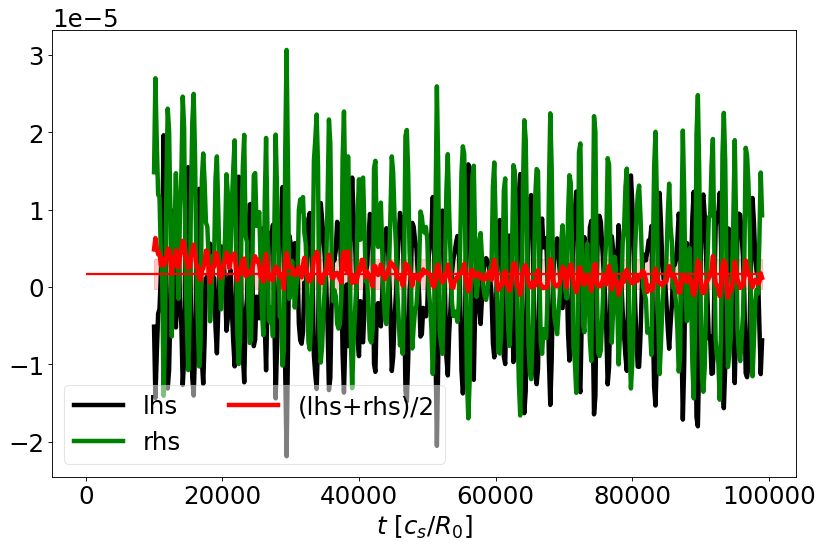

Invert for given numerical parameters
Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 0.0001
Average diff =  6.2128602371913735e-06
Average std  =  1.904521318368013e-06


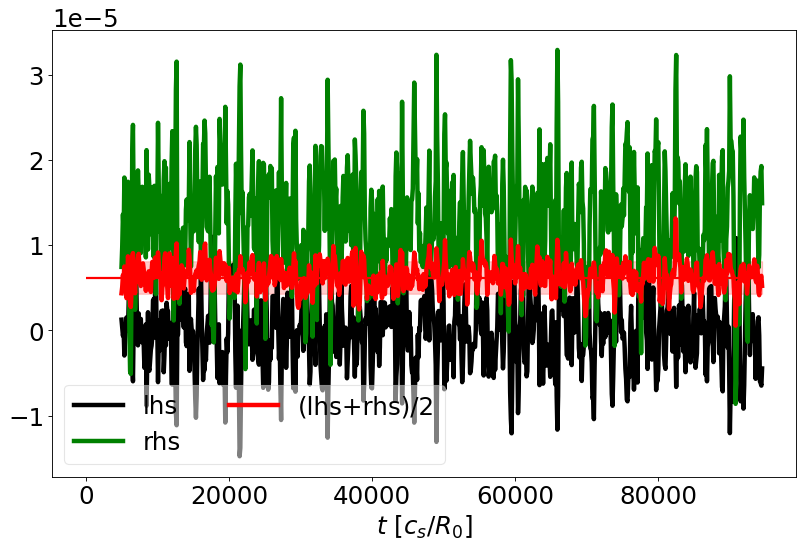

Invert for given numerical parameters
Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 1e-05
Average diff =  3.0498452950792095e-06
Average std  =  1.7806137637030488e-06


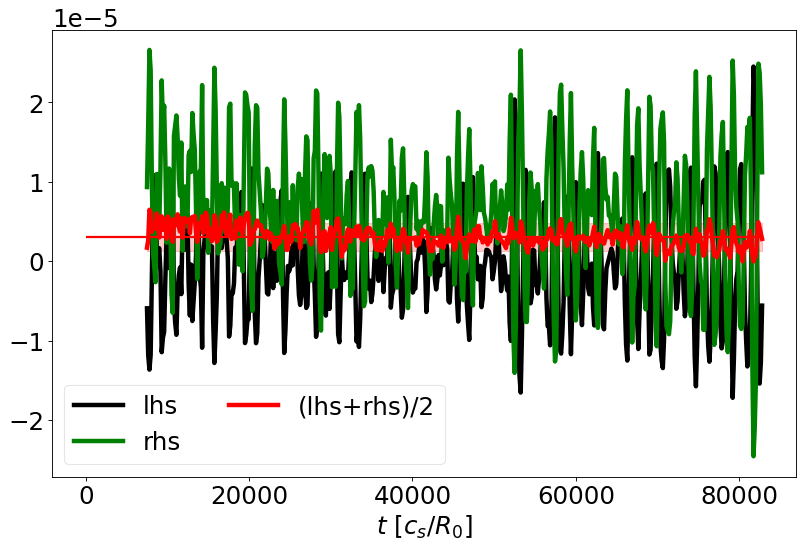

Invert for given numerical parameters
Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 3e-06
Average diff =  2.083509756196313e-06
Average std  =  2.0055155217250953e-06


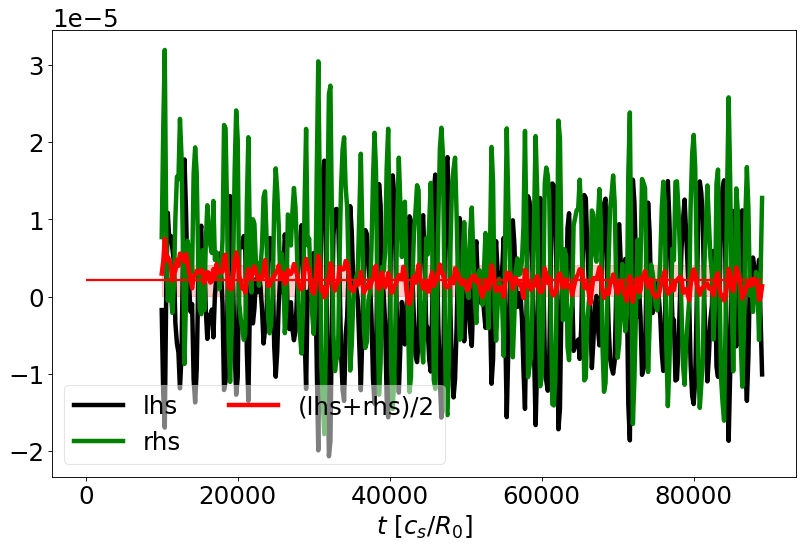

Invert for given numerical parameters
Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 3e-05
Average diff =  3.44556081294111e-06
Average std  =  1.9542220709480053e-06


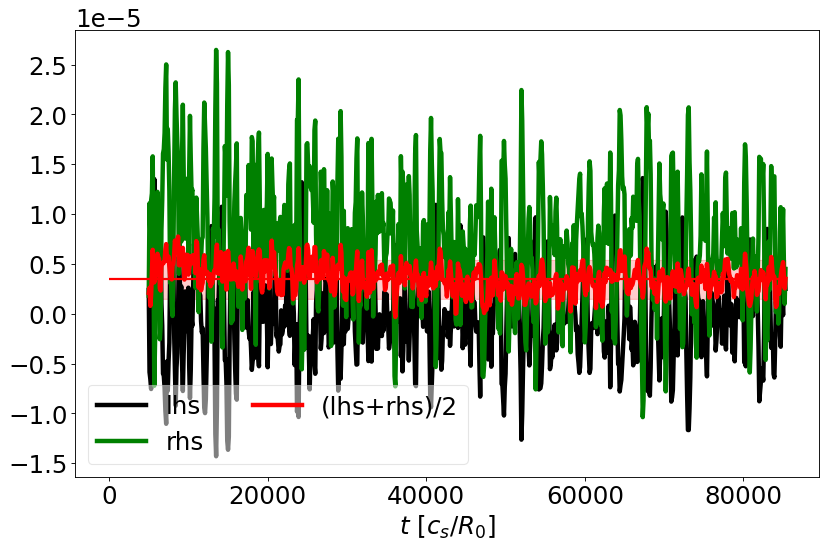

Invert for given numerical parameters
Index 167 vs lcfs 167
167
0.9982504105290998
Resistivity = 0.0003
Average diff =  1.0497008871170952e-05
Average std  =  2.355460540556861e-06


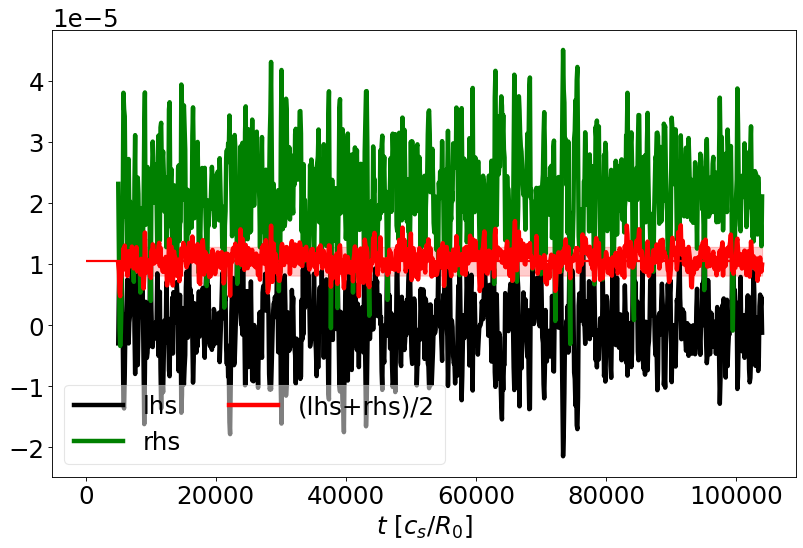

In [60]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )
    time = np.asarray(dset['time'][:])
    timett = np.append(2*time[len(time)-1] -time[len(time)-2], time ) # extrapolate
    deltat = np.diff(timett)
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0   
#     vorticity = dset['vorticity_fsa'][:,:]
#     el = dset['electrons_ifs'][:,:]
#     ions = dset['ions_ifs'][:,:]
#     dvdpsip=dset['dvdpsi'][:]
#     vorticity = (el-ions)/dvdpsip
    vorticity =np.asarray(dset['oexbe_fsa'][:,:])
    # vorticity+=dset['odiae_fsa'][:,:]
    # vorticity/=dset['electrons_fsa'][:,:]
    tttvorticity=np.append(np.zeros((1,len(rho_t))),vorticity, axis=0)
    deltavorticity = np.diff(tttvorticity,axis=0)/deltat[:,None]
    jvoE= np.asarray(dset['jvoexbe_tt_ifs'][:,:])/deltat[:,None]
    jvoD= np.asarray(dset['jvoexbeUD_tt_ifs'][:,:])/deltat[:,None]
    # jvoD= dset.variables['jvodiaeUE_tt_ifs'][:,:]/deltat[:,None]
    maxwell= np.asarray(dset['jvoapar_tt_ifs'][:,:])/deltat[:,None]
    jvoA= np.asarray(dset['jvoexbApar_tt_ifs'][:,:])/deltat[:,None]
    # jvoA= dset['jvodiaApar_tt_ifs'][filter,:]/deltat[:,None]
    jvo = jvoE + jvoD + maxwell + jvoA
    force = -np.asarray(dset["socurve_tt_fsa"][:,:])/deltat[:,None]
    force -= np.asarray(dset["socurvi_tt_fsa"][:,:])/deltat[:,None]
    force -= np.asarray(dset["socurvkappae_tt_fsa"][:,:])/deltat[:,None]
    force -= np.asarray(dset["socurvkappai_tt_fsa"][:,:])/deltat[:,None]
    # force2 = -dset["curvne_tt_ifs"][:,:]/deltat[:,None]/dvdpsi[:]
    # source = dset["sosne_tt_fsa"][:,:]/deltat[:,None]
    # source+= dset["sospi_tt_fsa"][:,:]/deltat[:,None]
    lamb = np.asarray(dset["loexbe_tt_fsa"][:,:])/deltat[:,None]
    #lamb = dset['lneperp_tt_ifs'][:,:]/deltat[:,None]

    #lamb = lamb/dvdpsip[None,:]

    rhs = jvo+force-lamb#-source
    # diff = +deltavorticity + rhs
    diff = (deltavorticity +rhs)/2
    # delayed_diff = (deltavorticity[0:-1,:]+rhs[1:,:])/2
    average_diff = np.mean( diff[1:], axis=0)
    average_std = np.std( diff[1:], axis=0)
    # rhs = rhs - 2*average_diff[None, :]
    # diff = ( deltavorticity + rhs)/2
    
    lcfs = np.argmax( rho_t[np.where( rho_t < 1)])
    print( "Index 167 vs lcfs", lcfs)
    idx= 167
    print( idx)
    print( rho_t[idx])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff[idx])
    print( "Average std  = ", average_std[idx])
    plt.plot(time[min_idx:],deltavorticity[min_idx:,idx], color='k', marker='',
              ls='-',lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[min_idx:],rhs[min_idx:,idx], color='g', marker='',
              ls='-', lw = 4, markeredgecolor='k', markersize=8, label="rhs")
    plt.plot(time[min_idx:],diff[min_idx:,idx], color='r', marker='',
              ls='-', lw = 4, markeredgecolor='k', markersize=8, label="(lhs+rhs)/2")
#     plt.plot(time[min_idx:],10*jvoE[min_idx:,idx], color='salmon', marker='',
#               ls='-',lw=4,markeredgecolor='k', markersize=8, label="jvoE")
#     plt.plot(time[min_idx:],10*jvoD[min_idx:,idx], color='lightblue', marker='',
#               ls='-',lw=4,markeredgecolor='k', markersize=8, label="jvoD")
#     # plt.plot(time[min_idx:],-source[min_idx:,idx], color='crimson', marker='',
#     #           ls='-', lw = 4, markeredgecolor='k', markersize=8, label="-source")
#     plt.plot(time[min_idx:],force[min_idx:,idx], color='y', marker='',
#               ls='-', lw = 4, markeredgecolor='k', markersize=8, label="force")
#     plt.plot(time[min_idx:],jvoA[min_idx:,idx], color='orange', marker='',
#               ls='-', lw = 4, markeredgecolor='k', markersize=8, label="jvoA")
#     plt.plot(time[min_idx:],maxwell[min_idx:,idx], color='pink', marker='',
#               ls='-', lw = 4, markeredgecolor='k', markersize=8, label="Maxwell")
    # plt.plot(time[min_idx:],-lamb[min_idx:,idx], color='lightyellow', marker='',
    #           ls='-', lw = 4, markeredgecolor='k', markersize=8, label="-lambda")
    plt.hlines(average_diff[idx], time[0], time[len(time)-1], color='r', lw=2 )
    plt.fill_between( time[min_idx:], average_diff[idx]-average_std[idx], 
                      average_diff[idx]+average_std[idx], color='red', alpha=0.2)

    # print(time[len(time)-1])
    # idx = np.where( time[np.where( time < 9356)]>9354)
    # print( idx[0][0] )
    # plt.plot( rho_t, force[ idx[0][0],: ], color='y', label = "force")
    # plt.plot( rho_t, jvo[ idx[0][0],: ], color='r', label = "jvo")
    # plt.plot( rho_t, deltavorticity[ idx[0][0],: ], color='g', label = "dO")
    
    
    # plt.plot( rho_t, average_diff, ls = '-', color=v[0], lw = 4, label = v[1])
    # plt.fill_between( rho_t[0:167], average_diff[0:167]-average_std[0:167], 
    #                   average_diff[0:167]+average_std[0:167], color=v[0], alpha=0.2)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='lower left',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")
    # plt.xlabel(r"$\rho_t$")
    # plt.xlim(0,6)
    # plt.ylabel(r"$\int dV \Omega_E$")
    #plt.xlim(6360,6400)
    # plt.xlim(0,1.0)
    # plt.ylim(-2e-2,2e-2)

    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.show(   )

## Ion toroidal momentum plot

Invert for given numerical parameters


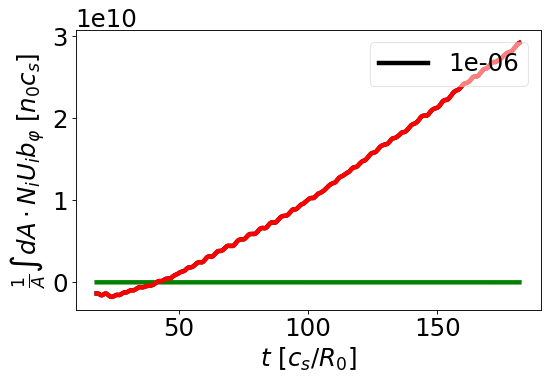

Invert for given numerical parameters


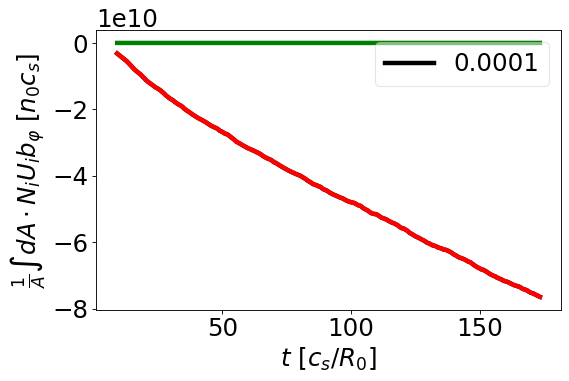

Invert for given numerical parameters


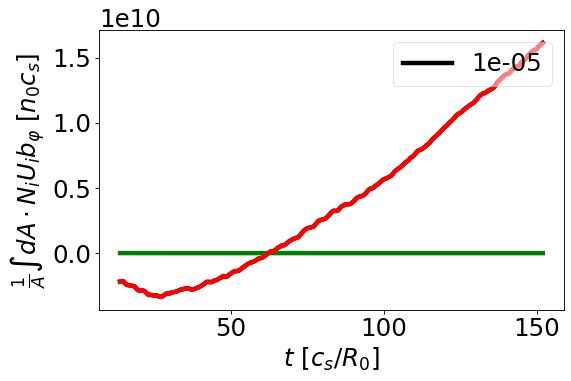

Invert for given numerical parameters


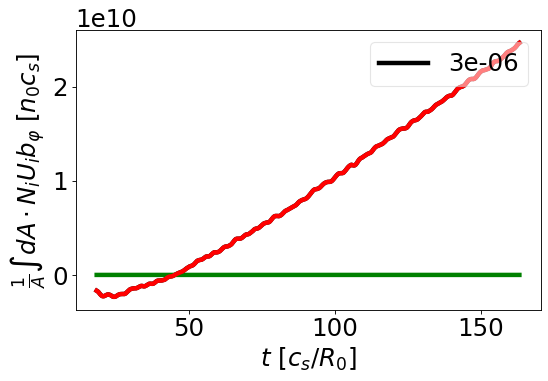

Invert for given numerical parameters


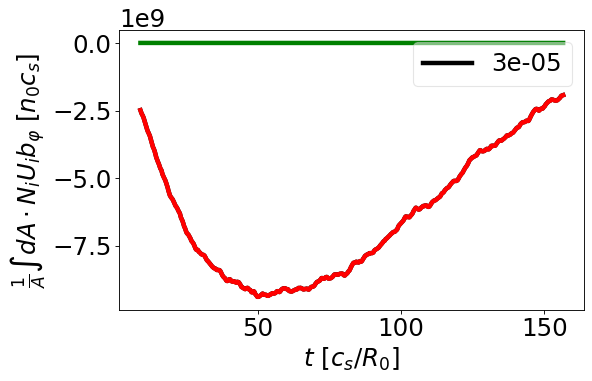

Invert for given numerical parameters


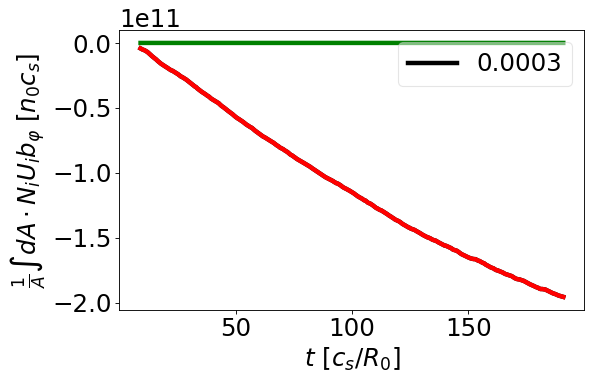

In [61]:
for file in content :
    fig,ax=plt.subplots(1,1,figsize=(1.25*6,1.25*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    params = json.loads( dset.inputfile )
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0
    time = dset.variables['time'][:]*timescale
    
    niuibphi = dset.variables['niuibphi_ifs_lcfs'][:]
    oexb = dset.variables['oexbi_ifs_lcfs'][:]

    plt.plot(time[min_idx:],niuibphi[min_idx:], color='k', 
             marker='',ls='-', lw=4,markeredgecolor='k', markersize=8, 
             label=f'{params["physical"]["resistivity"]}')
    plt.plot(time[min_idx:],oexb[min_idx:], color='g', 
         marker='',ls='-', lw=4,markeredgecolor='k', markersize=8
         )
    plt.plot(time[min_idx:],niuibphi[min_idx:]-oexb[min_idx:], color='r', 
         marker='',ls='-', lw=4,markeredgecolor='r', markersize=8
         )

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    da.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")
    plt.ylabel(r"$\frac{1}{A}\int dA \cdot N_iU_ib_\varphi\ [n_0c_s]$")

    plt.show(   )

### Ion toroidal momentum accuracy

Invert for given numerical parameters
Resistivity = 1e-06
Average diff =  -8634.002562814943


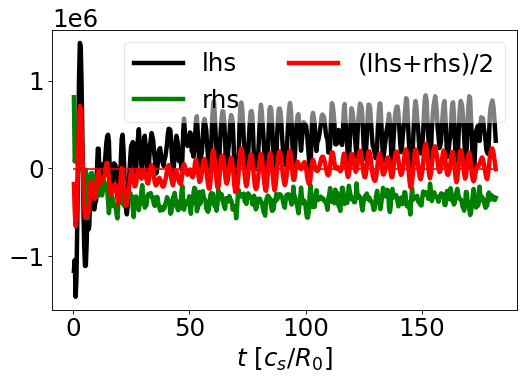

Invert for given numerical parameters
Resistivity = 0.0001
Average diff =  -1097904.847506203


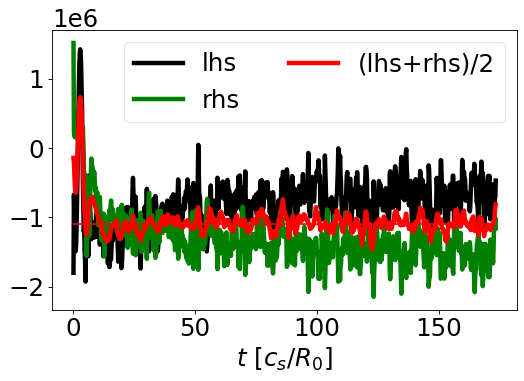

Invert for given numerical parameters
Resistivity = 1e-05
Average diff =  -187918.25932693342


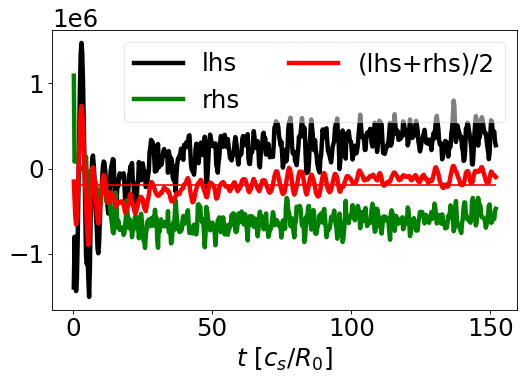

Invert for given numerical parameters
Resistivity = 3e-06
Average diff =  -47666.50198907576


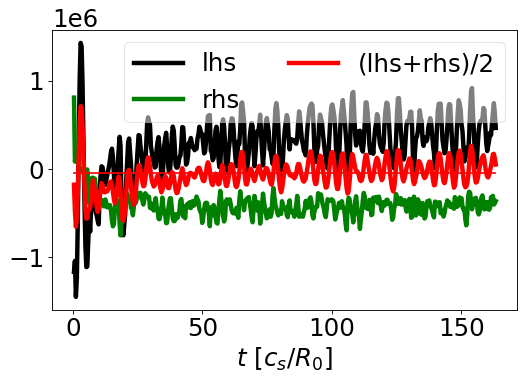

Invert for given numerical parameters
Resistivity = 3e-05
Average diff =  -423641.4302589206


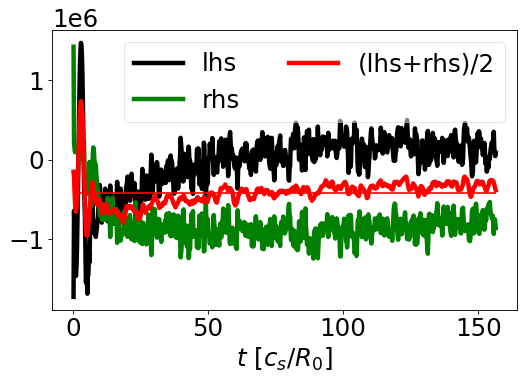

Invert for given numerical parameters
Resistivity = 0.0003
Average diff =  -1832009.6458343377


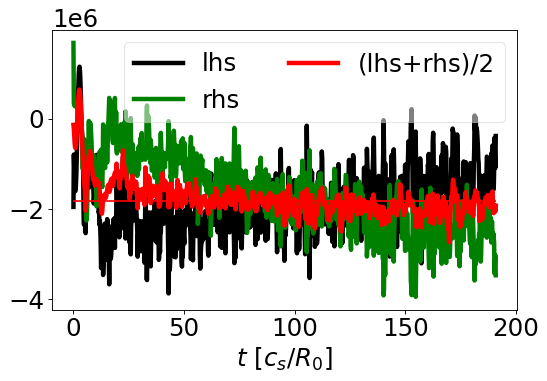

In [62]:
for file in content :
    fig,ax=plt.subplots(1,1,figsize=(1.25*6,1.25*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    params = json.loads( dset.inputfile )
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0
    time = dset.variables['time'][:]
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    
    mass =np.asarray(dset.variables['niuibphi_ifs_lcfs'][:])
    masstt=np.append(np.zeros(1),mass, axis=0)
    deltamass = np.diff(masstt,axis=0)/deltat

    source = np.asarray(dset.variables['sparsnibphi_tt_ifs_lcfs'][:])/deltat
    deltamass-=source
    jvne= np.asarray(dset['jvparbphiexbi_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvparbphiApar_tt_ifs_lcfs'][:])/deltat
    
    force = -np.asarray(dset.variables["socurve_tt_ifs_lcfs"][:])/deltat
    force -= np.asarray(dset.variables["socurvi_tt_ifs_lcfs"][:])/deltat
    force -= np.asarray(dset.variables["socurvkappae_tt_ifs_lcfs"][:])/deltat
    force -= np.asarray(dset.variables["socurvkappai_tt_ifs_lcfs"][:])/deltat
    rhs = jvne-force
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean(diff[min_idx:])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff)
    plt.plot(time[1:]*timescale,deltamass[1:], color='k', marker='',
              ls='-', lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[1:]*timescale,rhs[1:], color='g', marker='',
              ls='-', lw=4,markeredgecolor='g', markersize=8, label="rhs")
    plt.plot(time[1:]*timescale,diff[1:], color='r', marker='',ls='-', 
              lw=4,markeredgecolor='r', markersize=8, label="(lhs+rhs)/2")
    plt.hlines(average_diff, time[0]*timescale, time[len(time)-1]*timescale, color='r')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")

    plt.show(   )

## Ion parallel momentum

Invert for given numerical parameters
Resistivity = 1e-06
timescale = 0.001834862385321101
Average diff =  -91.37813837213606


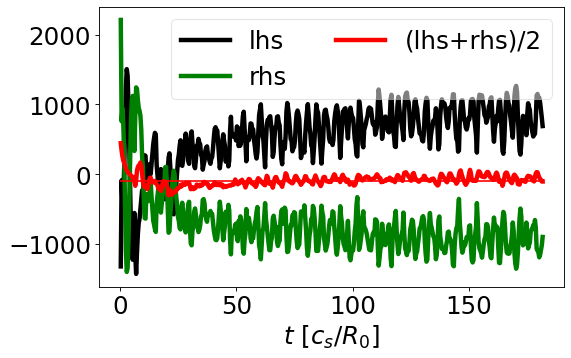

Invert for given numerical parameters
Resistivity = 0.0001
timescale = 0.001834862385321101
Average diff =  -1474.7618318575185


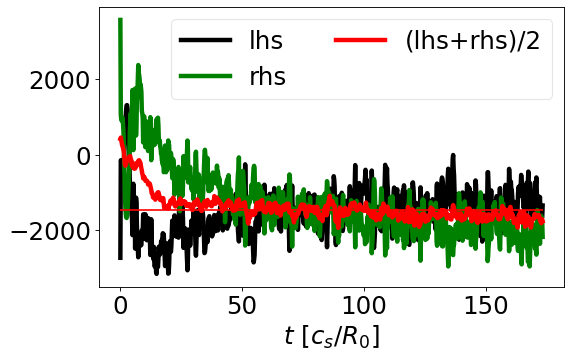

Invert for given numerical parameters
Resistivity = 1e-05
timescale = 0.001834862385321101
Average diff =  -411.54213333146527


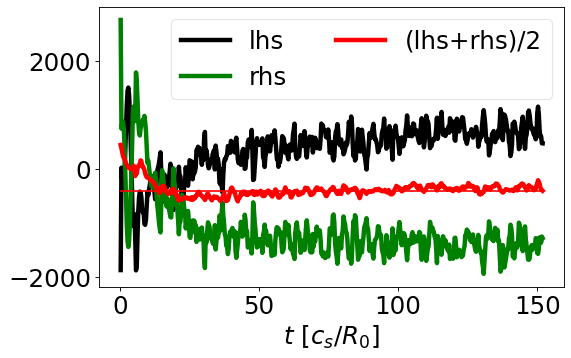

Invert for given numerical parameters
Resistivity = 3e-06
timescale = 0.001834862385321101
Average diff =  -183.5082262126279


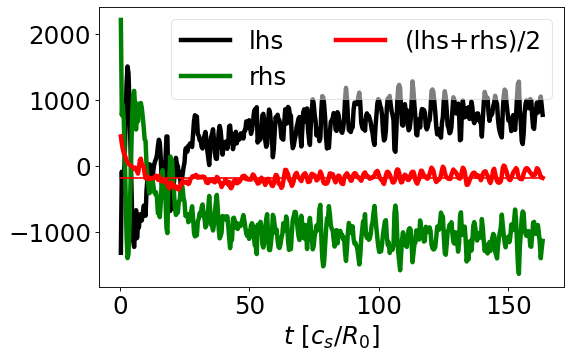

Invert for given numerical parameters
Resistivity = 3e-05
timescale = 0.001834862385321101
Average diff =  -756.1676232218231


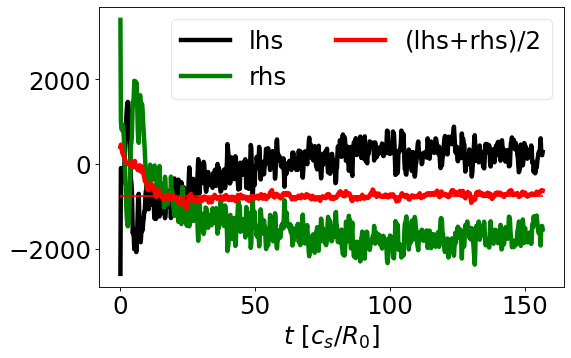

Invert for given numerical parameters
Resistivity = 0.0003
timescale = 0.001834862385321101
Average diff =  -1718.6791256194585


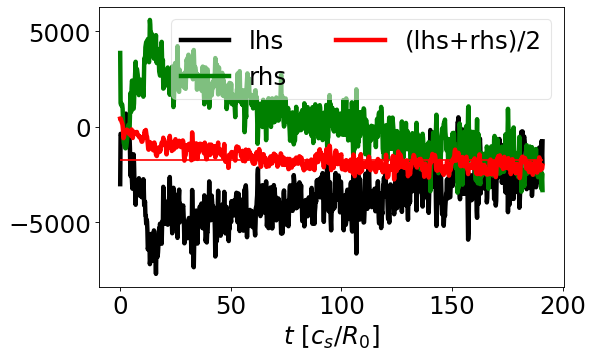

In [63]:
# content = []
# content.append( full_content[3])
for file in content :
    fig,ax=plt.subplots(1,1,figsize=(1.25*6,1.25*3.7),dpi= 80, facecolor='w', edgecolor='k')
    dset = create_merged_dataset( diag, file)
    params = json.loads( dset.inputfile )
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0
    time = dset.variables['time'][:]
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    
    mass =np.asarray(dset.variables['niui_ifs_lcfs'][:])
    masstt=np.append(np.zeros(1),mass, axis=0)
    deltamass = np.diff(masstt,axis=0)/deltat

    source = np.asarray(dset.variables['sparsni_tt_ifs_lcfs'][:])/deltat
    deltamass-=source
    jvne= np.asarray(dset['jvparexbi_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvparApar_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvpardiai_tt_ifs_lcfs'][:])/deltat
    jvne+=np.asarray(dset['jvparkappai_tt_ifs_lcfs'][:])/deltat
    divjpar = np.asarray(dset['divjpare_tt_ifs_lcfs'][:])/deltat
    divjpar += np.asarray(dset['divjpari_tt_ifs_lcfs'][:])/deltat
    force = np.asarray(dset.variables["sparmirrore_tt_ifs_lcfs"][:])/deltat
    force += np.asarray(dset.variables["sparmirrori_tt_ifs_lcfs"][:])/deltat
    rhs = jvne-force+divjpar
    diff = (deltamass + rhs)/2
   
    average_diff = np.mean(diff[min_idx:])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print(f'timescale = {timescale}')
    print( "Average diff = ", average_diff)
    plt.plot(time[1:]*timescale,deltamass[1:], color='k', marker='',
              ls='-', lw=4,markeredgecolor='k', markersize=8, label="lhs")
    plt.plot(time[1:]*timescale,rhs[1:], color='g', marker='',
              ls='-', lw=4,markeredgecolor='g', markersize=8, label="rhs")
    plt.plot(time[1:]*timescale,diff[1:], color='r', marker='',ls='-', 
              lw=4,markeredgecolor='r', markersize=8, label="(lhs+rhs)/2")
    plt.hlines(average_diff, time[0]*timescale, time[len(time)-1]*timescale, color='r')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper right',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")

    plt.show(   )

## Parallel electron force balance

Invert for given numerical parameters
Resistivity = 1e-06
Average diff =  -3417.833470002984


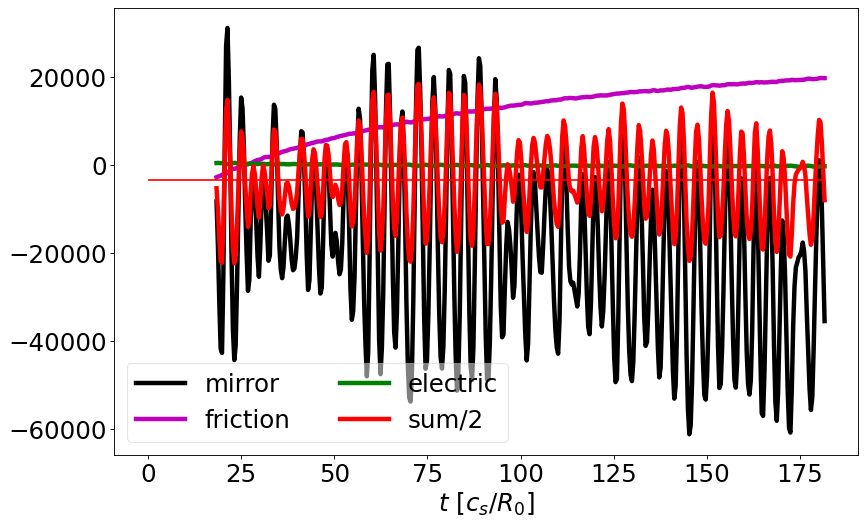

Invert for given numerical parameters
Resistivity = 0.0001
Average diff =  -244734.0276963824


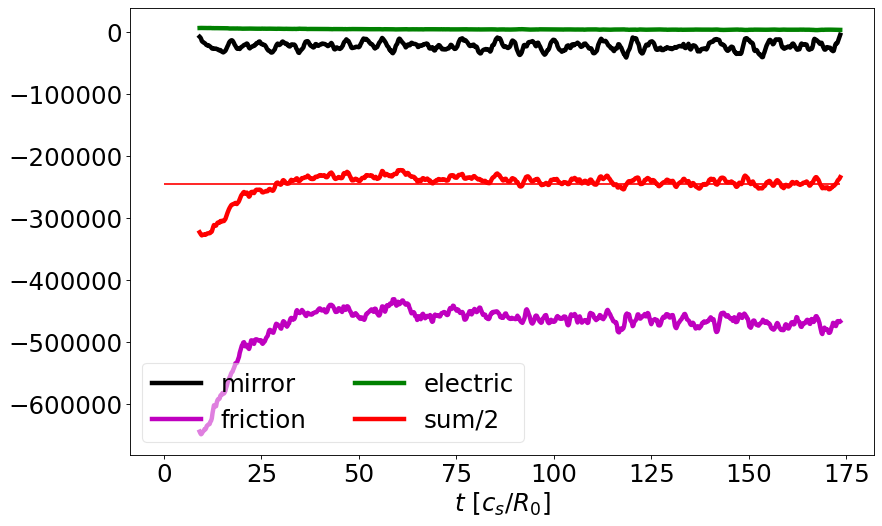

Invert for given numerical parameters
Resistivity = 1e-05
Average diff =  -14135.167625654198


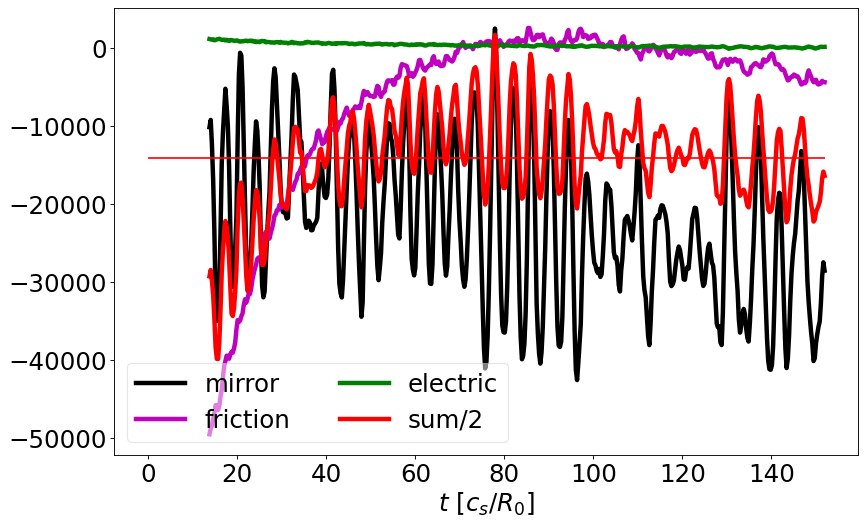

Invert for given numerical parameters
Resistivity = 3e-06
Average diff =  -1553.3886520448068


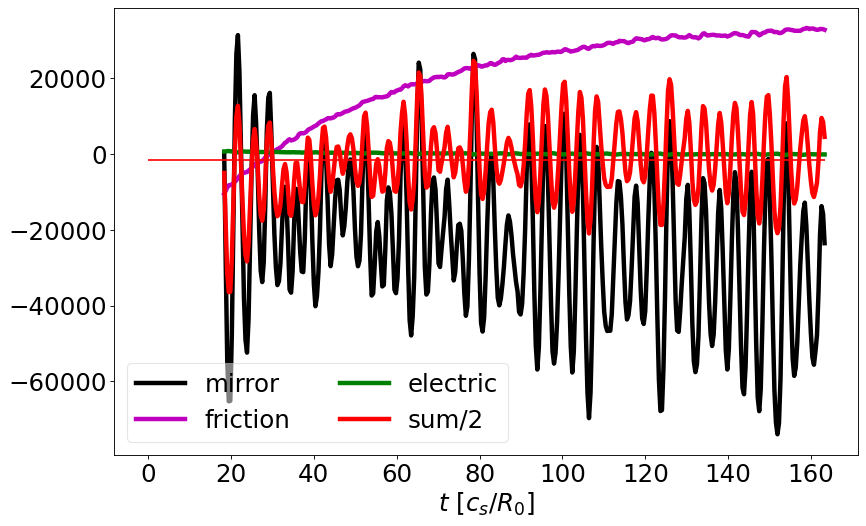

Invert for given numerical parameters
Resistivity = 3e-05
Average diff =  -56752.968446652594


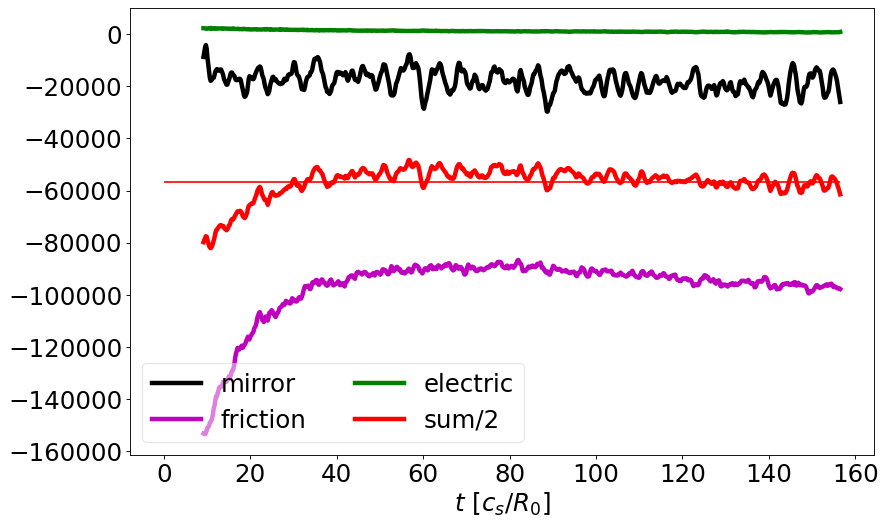

Invert for given numerical parameters
Resistivity = 0.0003
Average diff =  -801444.8740687143


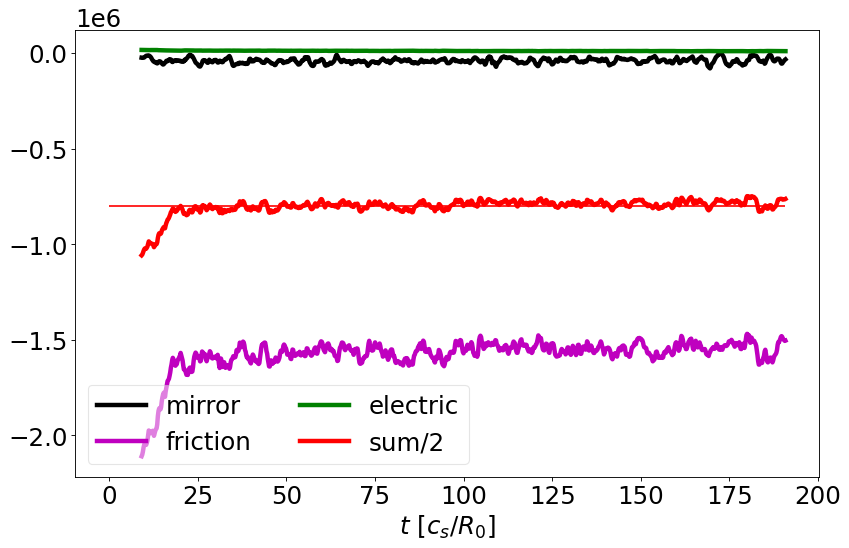

In [64]:

for file in content :
    fig,ax=plt.subplots(1,1,figsize=(2*6,2*3.7),dpi= 80, facecolor='w', edgecolor='k')
    #dset = Dataset( diag.outfile(file), 'r')
    dset = create_merged_dataset( diag, file)
    #print( dset)
    params = json.loads( dset.inputfile )
    time = np.asarray(dset['time'][:])
    timett = np.append(time, 2*time[len(time)-1] -time[len(time)-2]) # extrapolate
    deltat = np.diff(timett)
    num = {"R_0" : params["magnetic_field"]['params']["R_0"], **params["physical"]}
    fp.numerical2physical( num, params['physical'])
#     timescale = fp.omega_0_inv(**params['physical'])*1e3 # in ms
    timescale = 1/num['R_0']# in cs/R_0  
    mass =np.asarray(dset['sparmirrore_tt_ifs_lcfs'][:])
    mass+=np.asarray(dset['sparmirrorAe_tt_ifs_lcfs'][:])
    source =np.asarray(dset.variables['friction_tt_ifs_lcfs'][:])

    jvne = np.asarray(dset.variables['sparphie_tt_ifs_lcfs'][:])/deltat
    jvne+= np.asarray(dset.variables['sparphiAe_tt_ifs_lcfs'][:])/deltat
    jvne+= np.asarray(dset.variables['sparphiAe_tt_ifs_lcfs'][:])/deltat
    lhs = mass + source
    rhs = jvne
    diff = (lhs + rhs)/2
   
    average_diff = np.mean(diff[min_idx:])
    
    print(f'Resistivity = {params["physical"]["resistivity"]}')
    print( "Average diff = ", average_diff)
    plt.plot(time[min_idx:]*timescale,mass[min_idx:], color='k', marker='',
              ls='-', lw=4,markeredgecolor='k', markersize=8, label="mirror")
    plt.plot(time[min_idx:]*timescale,source[min_idx:], color='m', marker='',
              ls='-', lw=4,markeredgecolor='m', markersize=8, label="friction")
    plt.plot(time[min_idx:]*timescale,rhs[min_idx:], color='g', marker='',
              ls='-', lw=4,markeredgecolor='g', markersize=8, label="electric")
    plt.plot(time[min_idx:]*timescale,diff[min_idx:], color='r', marker='',ls='-', 
              lw=4,markeredgecolor='r', markersize=8, label="sum/2")
    plt.hlines(average_diff, time[0]*timescale, time[len(time)-1]*timescale, color='r')
#     plt.plot(time[min_idx:]*timescale,divjvnepar[min_idx:], color='g', marker='',
#              ls='--', lw = 4, label="parallel")
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='lower left',numpoints=1,ncol=2,
                   fontsize='medium',framealpha=0.5)
    dset.close()
    
    plt.xlabel(r"$t\ [c_s/R_0]$")

    plt.show(   )